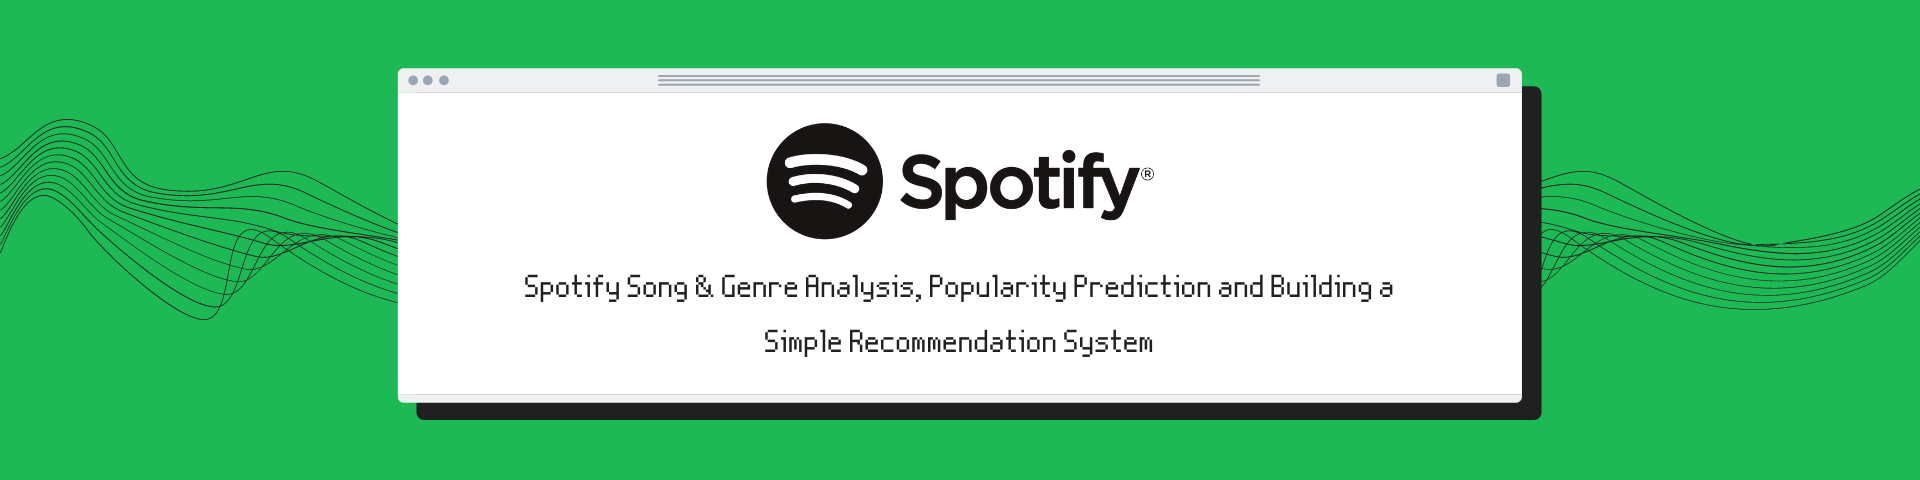

#**Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System**
####This project aims to make some inferences using spotify data and to create a model based on these inferences. It is also aimed to better understand the inferences and see the correlations by using different visualization techniques. 

####Related data can be found from [here](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks).
 
##**Group ID: 5**
- Aysun Öğüt 26609
- Güneş Özgün 23521
+ Omay Ece Ayyıldız 28030
+ Ozan Özgün 28286


#**Exploratory Data Analysis**

## ***Visualizations Descriptive Statistics***

### **- Data Extraction and Necessary Library Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/CS210

/content/drive/MyDrive/CS210


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from os.path import join
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
from collections import Counter
from plotly.subplots import make_subplots 
import plotly.graph_objs as pgo
from scipy.stats import f_oneway
from scipy import stats

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

from sklearn import datasets
from statistics import stdev
from fractions import Fraction as fr
from scipy import special

from scipy.spatial.distance import cdist

In [ ]:
data = pd.read_csv('data.csv')
data.head()

acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]

### **- Checking Data Characteristics**

In [ ]:
data.shape #Row and column count

(174389, 19)

In [ ]:
data.dtypes # data types of each column

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
data.info()  # a summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

### **- Handling Missing Values**


In [ ]:
data.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
#It is only in the last row, so drop it
data.dropna(how="any",inplace=True) 
data.shape

(174389, 19)

### **- Modify Columns**


We can split the artists into separete rows in order to analyze each row correctly. To do so, we first splitted the lists, then we removed square brackets and quotation marks from the strings.

In [ ]:
data["artists"] = data.artists.apply(lambda x:x.replace("[","").replace("]","").replace("'","").replace("\"","").split(","))
data = data.explode('artists')

We can also convert duration information from miliseconds to seconds to understand it easier.

In [ ]:
data["duration_ms"] = data["duration_ms"]/1000
data.rename(columns={"duration_ms": "duration_s"},inplace=True)

In [ ]:
data.head()

acousticness               artists  danceability  ...    tempo  valence  year
0      0.991000           Mamie Smith         0.598  ...  149.976   0.6340  1920
1      0.643000  Screamin Jay Hawkins         0.852  ...   86.889   0.9500  1920
2      0.993000           Mamie Smith         0.647  ...   97.600   0.6890  1920
3      0.000173       Oscar Velazquez         0.730  ...  127.997   0.0422  1920
4      0.295000                  Mixe         0.704  ...  122.076   0.2990  1920

[5 rows x 19 columns]

In [ ]:
data.describe().round(decimals=1)

acousticness  danceability  duration_s  ...     tempo   valence      year
count      235675.0      235675.0    235675.0  ...  235675.0  235675.0  235675.0
mean            0.6           0.5       239.3  ...     115.3       0.5    1975.4
std             0.4           0.2       156.5  ...      30.4       0.3      27.7
min             0.0           0.0         4.9  ...       0.0       0.0    1920.0
25%             0.1           0.4       165.3  ...      91.6       0.3    1952.0
50%             0.6           0.5       207.6  ...     113.9       0.5    1974.0
75%             0.9           0.7       272.9  ...     133.7       0.7    1999.0
max             1.0           1.0      5338.3  ...     243.5       1.0    2021.0

[8 rows x 15 columns]

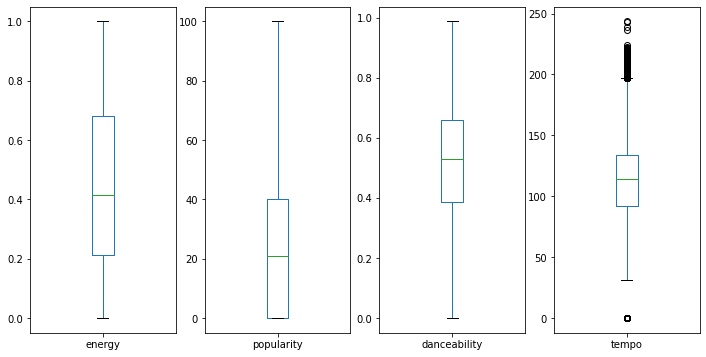

In [ ]:
# distribution plots
fig, ax = plt.subplots(1, 4, figsize=(12,6))
data["energy"].plot(kind="box", ax=ax[0])
data["popularity"].plot(kind="box", ax=ax[1])
data["danceability"].plot(kind="box", ax=ax[2])
data["tempo"].plot(kind="box", ax=ax[3])

We can see different distribution plots for different variables here. We see many outliers in the tempo boxplot. We can say that there are values ​​outside the average values.

## ***Example Visualizations of Aggregated Forms Based on Features***

There are many different variables in the data sets. In this section, the relationships of these variables with each other are examined.









In [ ]:
# Correlation Matrix
data[['popularity', 'acousticness', 'artists', 'danceability', 'duration_s', 'energy',
'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness','mode', 'name', 
'release_date', 'speechiness', 'tempo', 'valence', 'year']].corr()

popularity  acousticness  ...   valence      year
popularity          1.000000     -0.433258  ...  0.121692  0.540368
acousticness       -0.433258      1.000000  ... -0.232036 -0.634622
danceability        0.190869     -0.363607  ...  0.581443  0.229541
duration_s         -0.006109     -0.037634  ... -0.213736  0.056218
energy              0.353566     -0.773353  ...  0.385825  0.562826
explicit            0.227774     -0.252408  ...  0.023097  0.209731
instrumentalness   -0.293284      0.240573  ... -0.234311 -0.123716
key                 0.004709     -0.033741  ...  0.027284  0.016638
liveness           -0.084559     -0.018167  ...  0.001389 -0.009332
loudness            0.345518     -0.584425  ...  0.374033  0.462886
mode               -0.007675      0.082204  ...  0.010868 -0.060436
speechiness        -0.143974     -0.051514  ...  0.076909 -0.167930
tempo               0.109947     -0.241754  ...  0.195534  0.178521
valence             0.121692     -0.232036  ...  1.000000  0.017794
year                0.540368     -0.634622  ...  0.017794  1.000000

[15 rows x 15 columns]

The visualized version of this table is as follows:

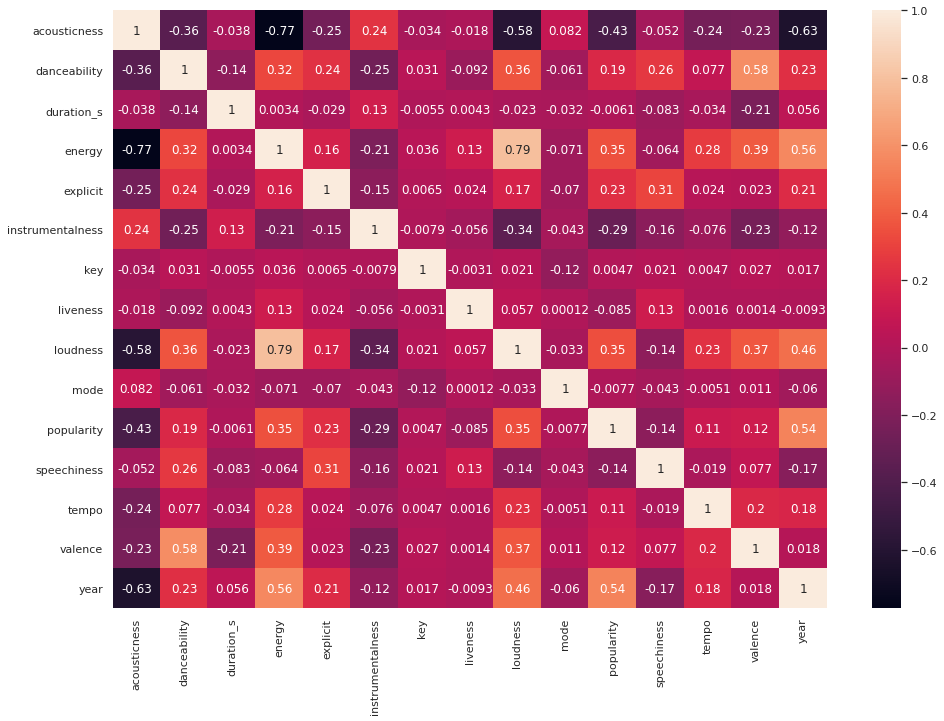

In [ ]:
plt.figure(figsize=(16, 11))
sns.set(style="darkgrid")
sns.heatmap(data.corr(),annot=True)


With the correlation matrix, we observe the following correlations


*   Energy and acousticness are negatively correlated
*   Energy and loudness are positively correlated
* There are weak correlations (>0.5) between
** Energy and year (positive)
** Popularity and year (positive)
** Acousticness and release date (negative)
** Acousticness and loudness (negative)

From the point of view of popularity, it cannot be said that the variables are very strongly related, but it can be observed that the popularity decreases as the acoustics increase.

The below histograms are given as total weights within data sets based on a single variable. We can understand the intervals in which variable distributions are more intense.

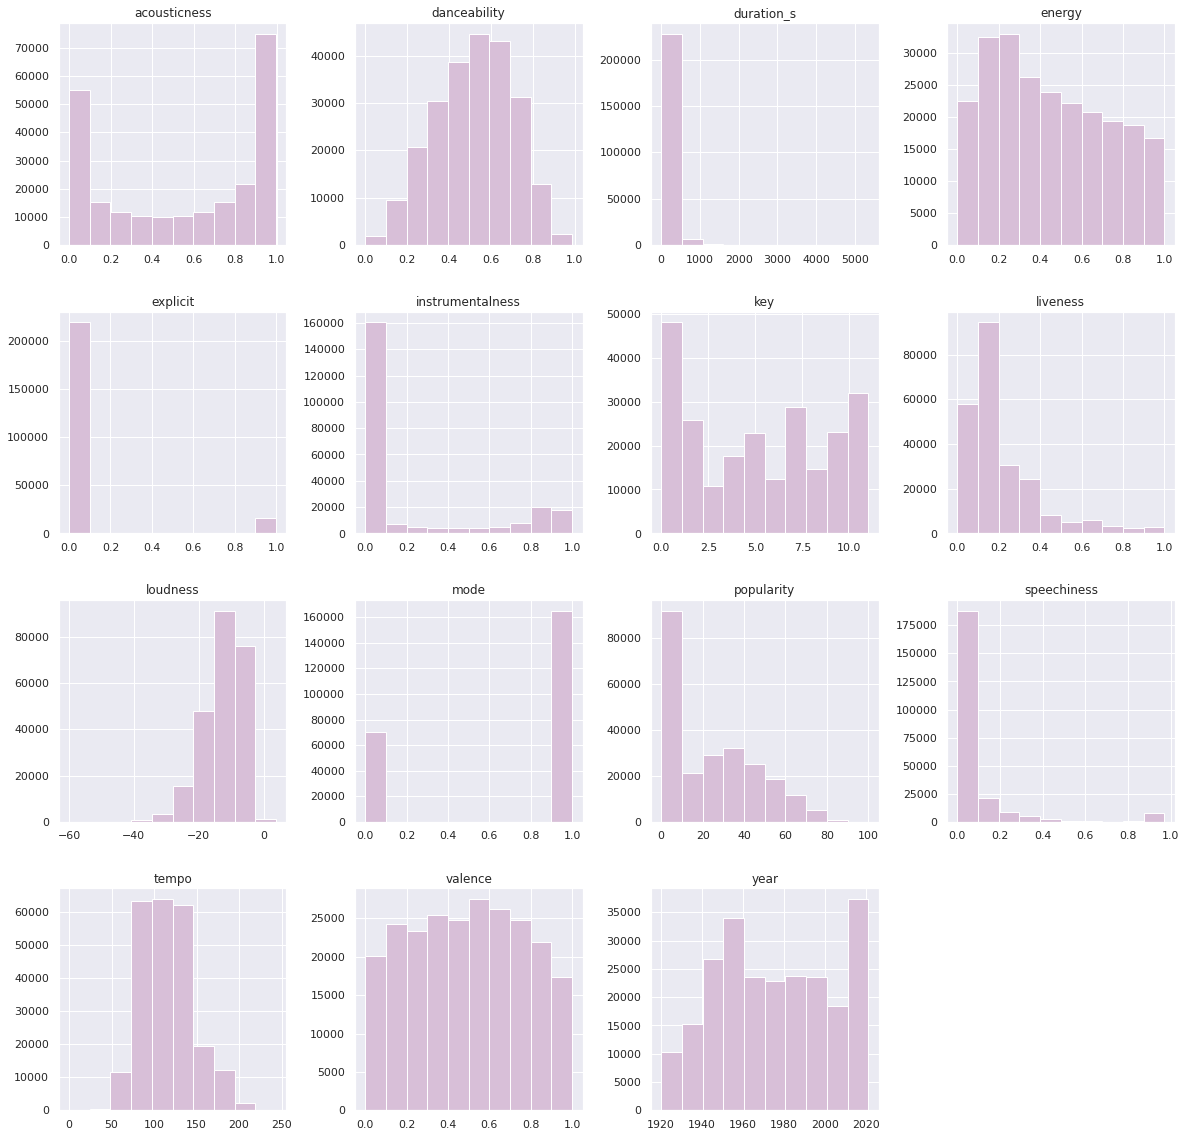

In [ ]:
data.hist(figsize=(20, 20), color= "thistle")
plt.show()

Let's take a closer look at the relationship between two different variables.

In [ ]:
#valence vs energy
corr = data[['valence','energy']]
corr["valence_int"] = pd.cut(data['valence'],np.arange(0,1,0.001))
corr = corr.groupby("valence_int").median()
plot = px.scatter(corr,x='valence', y='energy', width=1000, height=350)
plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are outliers that we can count, but since they are not so off, we decided to keep them. We see that the more positivity of the song, the higher its energy. Well, can we directly say that this also increases the popularity?

In [ ]:
#Popularity vs Energy
corr = data[['energy','popularity']]
corr["energy_int"] = pd.cut(data['energy'],np.arange(0,1,0.001))
corr = corr.groupby("energy_int").median()
plot = px.scatter(corr,x='energy', y='popularity', width=1000, height=350)
plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



When we compare the energy and popularity values, we observe that as the energy increases, the popularity increases. However, as can be seen from the figure, there is not a very strong relation, even it can be seen that there is a pause in recent years. On the other hand,

In [ ]:
#Popularity vs Valence
corr = data[['valence','popularity']]
corr["valence_int"] = pd.cut(data['valence'],np.arange(0,1,0.001))
corr = corr.groupby("valence_int").median()
plot = px.scatter(corr,x='valence', y='popularity', width=1000, height=350)
plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



When we look at the positiveness of the song (valence), we see that it does not change its popularity.  As a result, the relationship between multi values do not necessarily have the same effect on other variables.

In [ ]:
#Energy vs Acousticness
corr = data[['energy','acousticness']]
corr["ac_int"] = pd.cut(data['energy'],np.arange(0,1,0.001))
corr = corr.groupby("ac_int").median()
plot = px.scatter(corr,x='energy', y='acousticness', width=1000, height=350)
plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



As it can be seen in the table, energy and acousticness are negatively correlated.

#### **- Checking Data Characteristics**

It is important to understand the distribution of data so far over the years in order to create a predictive path for the future. This section shows the changes of different variables by years.

In [ ]:
df_by_year = pd.read_csv('data_by_year.csv') #reading the related data from year data
df_by_year.head()

year  acousticness  danceability  ...  popularity  key  mode
0  1920      0.631242      0.515750  ...    0.610315    2     1
1  1921      0.862105      0.432171  ...    0.391026    2     1
2  1922      0.828934      0.575620  ...    0.090909    5     1
3  1923      0.957247      0.577341  ...    5.205405    0     1
4  1924      0.940200      0.549894  ...    0.661017   10     1

[5 rows x 14 columns]

In [ ]:
df_by_year.shape

(102, 14)

In [ ]:
df_by_year.dtypes # data types of each column

year                  int64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [ ]:
df_by_year.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              102 non-null    int64  
 1   acousticness      102 non-null    float64
 2   danceability      102 non-null    float64
 3   duration_ms       102 non-null    float64
 4   energy            102 non-null    float64
 5   instrumentalness  102 non-null    float64
 6   liveness          102 non-null    float64
 7   loudness          102 non-null    float64
 8   speechiness       102 non-null    float64
 9   tempo             102 non-null    float64
 10  valence           102 non-null    float64
 11  popularity        102 non-null    float64
 12  key               102 non-null    int64  
 13  mode              102 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.3 KB


#### **- Handling Missing Values**

There are no null values in this data set

In [ ]:
df_by_year.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

#### **- Modify Duration Column**

In [ ]:
#converting time to seconds to better understand
df_by_year["duration_ms"] = df_by_year["duration_ms"]/1000 
df_by_year.rename(columns={"duration_ms": "duration_s"},inplace=True)

In [ ]:
df_by_year.head(10)

year  acousticness  danceability  ...  popularity  key  mode
0  1920      0.631242      0.515750  ...    0.610315    2     1
1  1921      0.862105      0.432171  ...    0.391026    2     1
2  1922      0.828934      0.575620  ...    0.090909    5     1
3  1923      0.957247      0.577341  ...    5.205405    0     1
4  1924      0.940200      0.549894  ...    0.661017   10     1
5  1925      0.962702      0.574875  ...    2.670251    5     1
6  1926      0.666387      0.596915  ...    1.436418    9     1
7  1927      0.915826      0.655929  ...    0.684000    1     1
8  1928      0.939141      0.534907  ...    1.453333    1     1
9  1929      0.601015      0.647840  ...    0.314406    7     1

[10 rows x 14 columns]

#### **- Example Visualizations of Features Based On Time**

We observe that throughout the years, songs are less acoustic, they have more energy, more danceability and tempo. Song durations has increased for a little but lately they are shorter.

In [ ]:
#Change in Acousticness over years
yearVsAc =go.Figure()
yearVsAc.add_trace(go.Scatter(x=df_by_year['year'], y= df_by_year['acousticness'],mode='markers + lines', marker = {'color' : 'lightcoral'},name="acousticness",showlegend=True))
yearVsAc.update_layout(title='Year Vs Acousticness',height=300)
yearVsAc.show()

#Change in Energy over years
yearVsEn =go.Figure()
yearVsEn.add_trace(go.Scatter(x=df_by_year['year'], y= df_by_year['energy'], mode='markers + lines', marker = {'color' : 'teal'},name="energy",showlegend=True))
yearVsEn.update_layout(title='Year Vs Energy',height=300)
yearVsEn.show()

#Change in Danceability over years
yearVsDc =go.Figure()
yearVsDc.add_trace(go.Scatter(x=df_by_year['year'], y= df_by_year['danceability'], mode='markers + lines',name="Danceability",marker = {'color' : 'darkorange'},showlegend=True))
yearVsDc.update_layout(title='Year Vs Danceability',height=300)
yearVsDc.show()

#Change in Tempo over years
yearVsLv =go.Figure()
yearVsLv.add_trace(go.Scatter(x=df_by_year['year'], y= df_by_year['tempo'], mode='markers + lines',name="tempo",showlegend=True))
yearVsLv.update_layout(title='Year Vs Tempo',height=300)
yearVsLv.show()

#Change in Song Duration over years
yearVsDr =go.Figure()
yearVsDr.add_trace(go.Scatter(x=df_by_year['year'], y= df_by_year['duration_s'], mode='markers + lines',marker = {'color' : 'red'},name="Duration(s)",showlegend=True))
yearVsDr.update_layout(title='Year Vs Duration',height=300)
yearVsDr.show()

We can observe that over the years, more energetic songs are created than static songs. In addition, as we can see in the correlation matrix, the relationship between acoustic songs and popularity is quite low. Here we can say that songs that are energetic and raise people's mood are more prone to be popular.

Over the years, values ​​such as energy, tempo and danceability have been increasing. We can say that the values ​​representing such mobility are in positive correlation with each other.

## ***Analysis of the Most Popular Artists and Songs***

### **- Checking Data Characteristics**

In [ ]:
df_by_artists = pd.read_csv('data_by_artist.csv') #read artist data
df_by_artists.head(10)

artists  acousticness  ...  mode  count
0                   "Cats" 1981 Original London Cast      0.598500  ...     1     10
1                          "Cats" 1983 Broadway Cast      0.862538  ...     1     26
2        "Fiddler On The Roof” Motion Picture Chorus      0.856571  ...     1      7
3     "Fiddler On The Roof” Motion Picture Orchestra      0.884926  ...     1     27
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.510714  ...     1      7
5  "Joseph And The Amazing Technicolor Dreamcoat"...      0.591167  ...     1     24
6                             "Mama" Helen Teagarden      0.725000  ...     1      2
7                            "Test for Victor Young"      0.927000  ...     1      2
8                                "Weird Al" Yankovic      0.186821  ...     1    106
9                                             $0dg0d      0.110000  ...     0      2

[10 rows x 15 columns]

In [ ]:
df_by_artists.shape

(32539, 15)

In [ ]:
df_by_artists.info() #check the characteristics about the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.7+ MB


In [ ]:
df_by_artists.describe()

acousticness  danceability  ...          mode         count
count  32539.000000  32539.000000  ...  32539.000000  32539.000000
mean       0.455682      0.552737  ...      0.734903     12.561818
std        0.383678      0.176445  ...      0.441392     52.407821
min        0.000000      0.000000  ...      0.000000      1.000000
25%        0.055155      0.436487  ...      0.000000      2.000000
50%        0.391833      0.563000  ...      1.000000      2.000000
75%        0.876000      0.684500  ...      1.000000      7.000000
max        0.996000      0.987000  ...      1.000000   3179.000000

[8 rows x 14 columns]

### **- Handling Missing Values**

In [ ]:
df_by_artists.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

The last row consists of null values, we can drop it.

In [ ]:
df_by_artists.dropna(how="any",inplace=True) 
df_by_artists.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64

### **- Visualizations**

We wanted to look at most popular artists of all times depending on their popularity score.

In [ ]:
popular_artists = df_by_artists.sort_values('popularity',ascending=False)
popular_artists = popular_artists[['artists', 'popularity']].head(10)
popular_artists

artists  popularity
4212                CJ        94.0
3767              Boza        92.0
13963       Joel Corry        91.0
14688             Juhn        91.0
23922      Ritt Momney        89.0
16413        Lele Pons        89.0
17173  Los Legendarios        89.0
14918            KIDDO        87.0
21024             Nuka        86.0
13565         Jerry Di        86.0

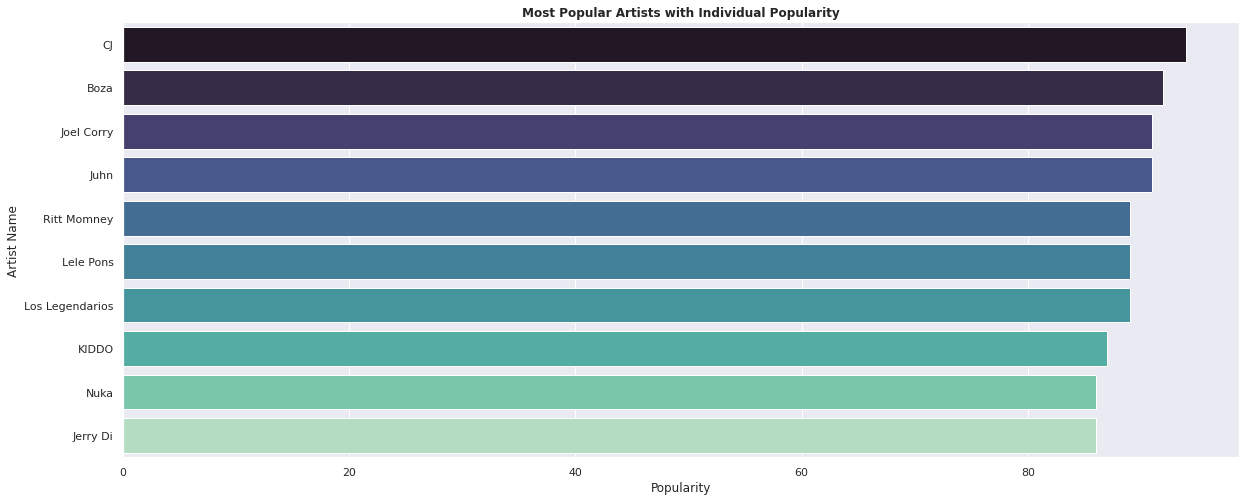

In [ ]:
#visualization of the most popular artists with individual popularity
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=popular_artists["popularity"], y=popular_artists["artists"], palette="mako")
ax.set_xlabel('Popularity')
ax.set_ylabel('Artist Name')
ax.set_title('Most Popular Artists with Individual Popularity', weight = 'bold')
plt.show()

The popularity of each artist has been visualized using the artist data set. Artist based popularity has been looked directly and this ranking has come out accordingly. With the highest score, CJ stands as the most popular artist.

On the other hand, another graphic can be obtained by adding the popularity of the songs they have released so far rather than the individual popularity of the artists.

In [ ]:
data_wo_split = pd.read_csv('data.csv')
data_wo_split['artists'] = data_wo_split['artists'].apply(lambda y:y.replace("[","").replace("]","").replace("'",""))
data_wo_split.dropna(how="any",inplace=True) 
data.shape

(235675, 19)

In [ ]:
#sum of the popularities
pop_artist = data_wo_split.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(10)
pop_artist

artists
The Beatles           19110
Frank Sinatra         17434
Elvis Presley         16998
Fleetwood Mac         15927
The Rolling Stones    15817
Bob Dylan             14057
Led Zeppelin          12823
Taylor Swift          12697
Queen                 12450
Johnny Cash           12011
Name: popularity, dtype: int64

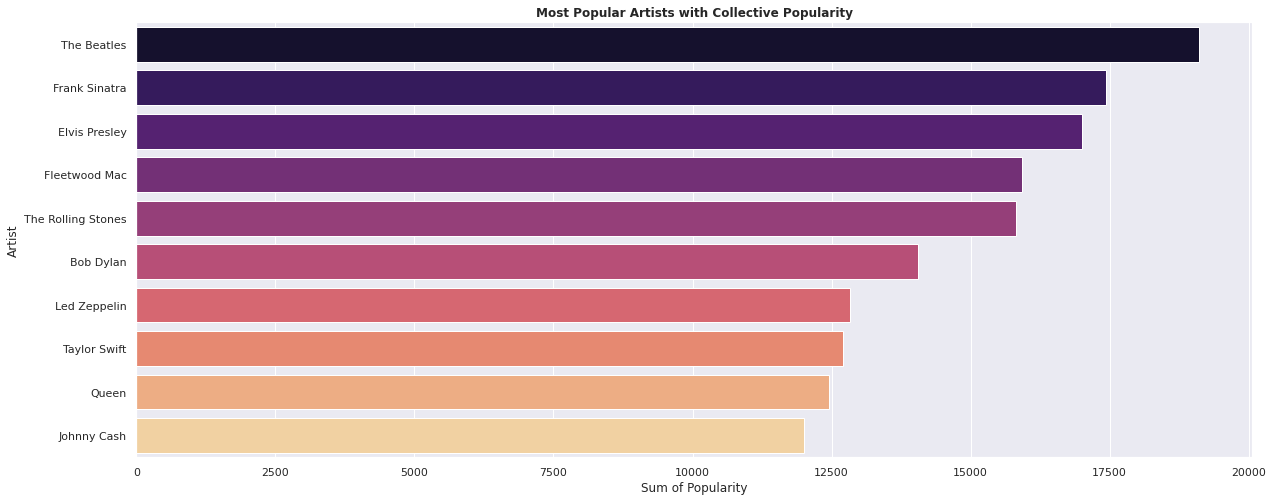

In [ ]:
#visualization of the list
fig, ax = plt.subplots(figsize = (20, 8))
ax = sns.barplot(x=pop_artist.values, y=pop_artist.index, palette="magma", ax=ax)
ax.set_xlabel('Sum of Popularity')
ax.set_ylabel('Artist')
ax.set_title('Most Popular Artists with Collective Popularity', weight = 'bold')
plt.show()

All the popularity of the artists included in the data was collected and a most popular artist was inferred from them. As can be seen in the figure, the most popular artist is Frank Sinatra with the highest count.

List and visualization of **the most popular songs**:

In [ ]:
pop_songs = data_wo_split.sort_values(by=['popularity'],ascending=False).reset_index()
pop_songs[['name','artists','year','popularity']].head(10)

name                 artists  year  popularity
0         drivers license          Olivia Rodrigo  2021         100
1  Mood (feat. iann dior)     24kGoldn, iann dior  2020          96
2               positions           Ariana Grande  2020          96
3                  DÁKITI  Bad Bunny, Jhay Cortez  2020          95
4                 BICHOTA                 KAROL G  2020          95
5                   34+35           Ariana Grande  2020          94
6                 Whoopty                      CJ  2020          94
7             WITHOUT YOU           The Kid LAROI  2020          94
8          Therefore I Am           Billie Eilish  2020          94
9      LA NOCHE DE ANOCHE      Bad Bunny, ROSALÍA  2020          94

As seen from the list, these are the 10 most popular songs.**Visualization of the most popular songs:**

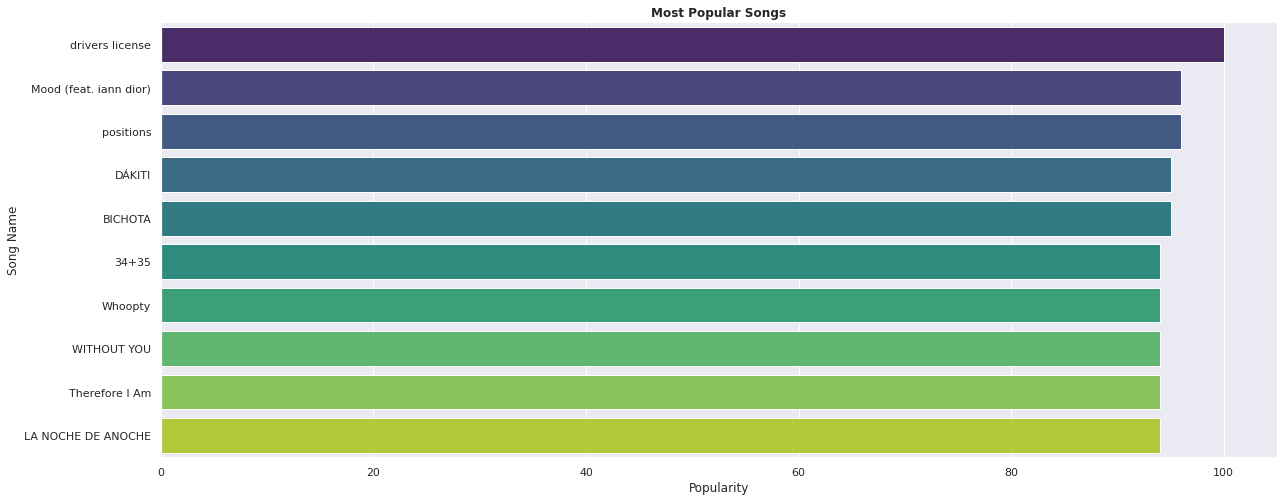

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=pop_songs['popularity'].head(10), y=pop_songs['name'].head(10), palette="viridis")
ax.set_xlabel('Popularity')
ax.set_ylabel('Song Name')
ax.set_title('Most Popular Songs', weight = 'bold')
plt.show()

## ***How Songs of Different Genres Change Over Time***

### **- Checking Data Characteristics**

In [ ]:
df_by_genres = pd.read_csv('data_by_genres.csv')
df_by_genres.dtypes

genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
dtype: object

In [ ]:
df_by_genres.head()

genres  acousticness  danceability  ...  popularity  key  mode
0  21st century classical      0.754600      0.284100  ...    6.600000    4     1
1                   432hz      0.485515      0.312000  ...   41.200000   11     1
2                   8-bit      0.028900      0.673000  ...    0.000000    5     1
3                      []      0.535793      0.546937  ...   12.350770    7     1
4              a cappella      0.694276      0.516172  ...   39.086248    7     1

[5 rows x 14 columns]

### **- Handling Missing Values**

In [ ]:
df_by_genres.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

We can count of often a word has been used to determine the main genres since they will appear the most in genre names.

In [ ]:
genre_names_text = " ".join(df_by_genres['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names_text).most_common(10)])

Algorithm source can be found from [here](https://www.kaggle.com/mindus/spotify-descriptive-and-exploratory-data-analysis).

In [ ]:
fig = px.bar(most_common_words_in_genres_df.sort_values("count"),x="count",y="word",labels={
                     "word": "Word in Genres",
                     "count": "Word Frequency"},orientation='h' )
fig.update_traces(marker_color='thistle')
fig.update_layout(height=600, width=1100, title_text="Most Common Words in Genre Names")

fig.show()

We see that "hip" and "hop" words are listed as seperate however we know that they correspond to the genre "hip hop". So we will count them as one.

### **- Most Popular Genres and Their Subgenres**

First create dataframes based on genre name and pick 5 the most popular ones to obtain main subgenres.

In [ ]:
pop_df = df_by_genres[df_by_genres["genres"].str.contains("pop")].sort_values("popularity").tail(5)
indie_df = df_by_genres[df_by_genres["genres"].str.contains("indie")].sort_values("popularity").tail(5)
rock_df = df_by_genres[df_by_genres["genres"].str.contains("rock")].sort_values("popularity").tail(5)
metal_df = df_by_genres[df_by_genres["genres"].str.contains("metal")].sort_values("popularity").tail(5)
classical_df = df_by_genres[df_by_genres["genres"].str.contains("classical")].sort_values("popularity").tail(5)
hiphop_df = df_by_genres[df_by_genres["genres"].str.contains("hip hop")].sort_values("popularity").tail(5)
jazz_df = df_by_genres[df_by_genres["genres"].str.contains("jazz")].sort_values("popularity").tail(5)

In [ ]:
fig = make_subplots(rows=4, cols=2,subplot_titles=('Pop', 'Indie', 'Rock', 'Metal', 'Classical', 'Hip hop', 'Jazz'))

fig.add_trace(pgo.Bar(x=pop_df['popularity'], y=pop_df['genres'], orientation='h', marker_color='lightpink'),
              1, 1)

fig.add_trace(pgo.Bar(x=indie_df['popularity'], y=indie_df['genres'], orientation='h', marker_color='lightsalmon'),
              1, 2)

fig.add_trace(pgo.Bar(x=rock_df['popularity'], y=rock_df['genres'], orientation='h', marker_color='lightskyblue'),
              2, 1)
              
fig.add_trace(pgo.Bar(x=metal_df['popularity'], y=metal_df['genres'], orientation='h', marker_color='thistle'),
              2, 2)

fig.add_trace(pgo.Bar(x=classical_df['popularity'], y=classical_df['genres'], orientation='h', marker_color='lightcoral'),
              3, 1)

fig.add_trace(pgo.Bar(x=hiphop_df['popularity'], y=hiphop_df['genres'], orientation='h', marker_color='lemonchiffon'),
              3, 2)

fig.add_trace(pgo.Bar(x=jazz_df['popularity'], y=jazz_df['genres'], orientation='h', marker_color='green'),
              4, 1)


fig.update_layout(height=800,width=1600,showlegend=False,bargap=0.3,title_text='Most Popular Subgenres')
fig.show()

We obtain the plot above when we count the most popular subgenres within the main genre dataframes and we plotted the top 5 subgenres of each. We used data_by_genres.csv for this analysis.

### **- Popularity Change of Main Genres Over Decades**

We will now analyse how popularity of each genre has changed throughout the years.

In [ ]:
df_w_genres = pd.read_csv('data_w_genres.csv')
df_w_genres.head(5)

artists  ...          genres
0                   "Cats" 1981 Original London Cast  ...  ['show tunes']
1                          "Cats" 1983 Broadway Cast  ...              []
2        "Fiddler On The Roof” Motion Picture Chorus  ...              []
3     "Fiddler On The Roof” Motion Picture Orchestra  ...              []
4  "Joseph And The Amazing Technicolor Dreamcoat"...  ...              []

[5 rows x 16 columns]

In [ ]:
df_w_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            32539 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [ ]:
df_w_genres.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

This dataframe does not have any null values.

Merging data.csv and data_w_genres.csv datasets in order to do genres' time series analysis since genres data file don't have year information.

In [ ]:
df_w_genres_main = pd.read_csv('data.csv')
df_w_genres_main["artists"] = df_w_genres_main.artists.apply(lambda x:x.replace("[","").replace("]","").replace("'","").split(","))
df_w_genres_main = df_w_genres_main.explode('artists')
df_w_genres = df_w_genres[["artists","genres"]]
df_w_genres_main = pd.merge(data,df_w_genres,on='artists',how='left')
df_w_genres_main.set_index('release_date',inplace=True)
df_w_genres_main.index = pd.to_datetime(df_w_genres_main.index)
genre_df = df_w_genres_main.drop(["artists"],axis=1).drop_duplicates()
genre_df.dropna(how="any",inplace=True) 
decade_popularity = pd.DataFrame()
most_popular_genres = ["pop","indie","rock","metal","classical", "hip hop", "jazz",]
df_w_genres_main.head()

acousticness  ...                                       genres
release_date                ...                                             
1920-01-01        0.991000  ...  ['harlem renaissance', 'traditional blues']
1920-01-05        0.643000  ...                                          NaN
1920-01-01        0.993000  ...  ['harlem renaissance', 'traditional blues']
1920-01-01        0.000173  ...                                  ['circuit']
1920-10-01        0.295000  ...                               ['glitchcore']

[5 rows x 19 columns]

In [ ]:
df_w_genres_main.isna().sum()

acousticness            0
artists                 0
danceability            0
duration_s              0
energy                  0
explicit                0
id                      0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
name                    0
popularity              0
speechiness             0
tempo                   0
valence                 0
year                    0
genres              63723
dtype: int64

We can see that some of the rows in data.csv does not how genre information in the data with genres data frame. Since we are dealing with genres and we have more than 200.000 rows, we decided to drop these rows.

In [ ]:
df_w_genres_main.dropna(how="any",inplace=True)
df_w_genres_main.shape

(171952, 19)

In [ ]:
genre_df.head()

acousticness  ...                                       genres
release_date                ...                                             
1920-01-01        0.991000  ...  ['harlem renaissance', 'traditional blues']
1920-01-01        0.993000  ...  ['harlem renaissance', 'traditional blues']
1920-01-01        0.000173  ...                                  ['circuit']
1920-10-01        0.295000  ...                               ['glitchcore']
1920-01-01        0.996000  ...                                           []

[5 rows x 18 columns]

In [ ]:
decade_popularity = pd.DataFrame()

most_popular_genres = ["pop","indie","rock","metal","classical","jazz", "hip hop"]

for genre in most_popular_genres:
    genre_decade_df = genre_df[genre_df.genres.str.contains(genre)].resample(rule='10A').mean()
    genre_decade_df.index = [f"{(date_index//10)*10}'s" for date_index in genre_decade_df.index.year]
    decade_popularity[genre] = genre_decade_df["popularity"]

decade_popularity.fillna(0,inplace=True)
decade_popularity = decade_popularity.head(11)

In [ ]:
decade_popularity['x'] = decade_popularity.index
df_melt = pd.melt(decade_popularity, id_vars="x", value_vars=decade_popularity.columns[:-1])

df_melt.columns = ['Decades', "Genre" , "Popularity"]

px.line(df_melt, x = "Decades", y = "Popularity", color="Genre", title="Popularity of Genres Through Decades")

We observe that popularity of each genre has increased throughout the years, this may be due to more people listening to music. But if we compare each, we see that after 2000s genres such as jazz and classical music has lost its popularity. On the other hand, pop, indie, rock, and hiphop has gained some audience.
Additionaly we can see that metal genre emerged in the 1960s, making it the youngest genre!

### **- Value Changes of Genres Over Decades**




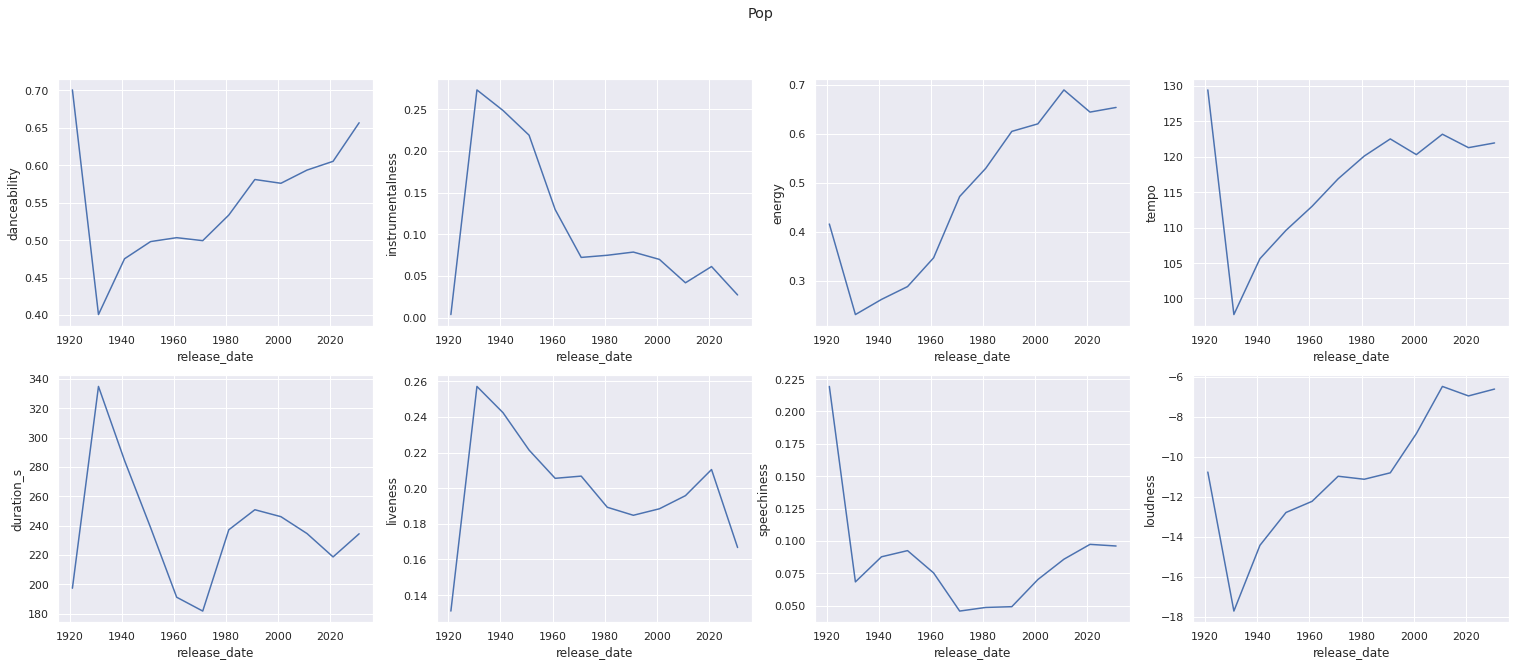

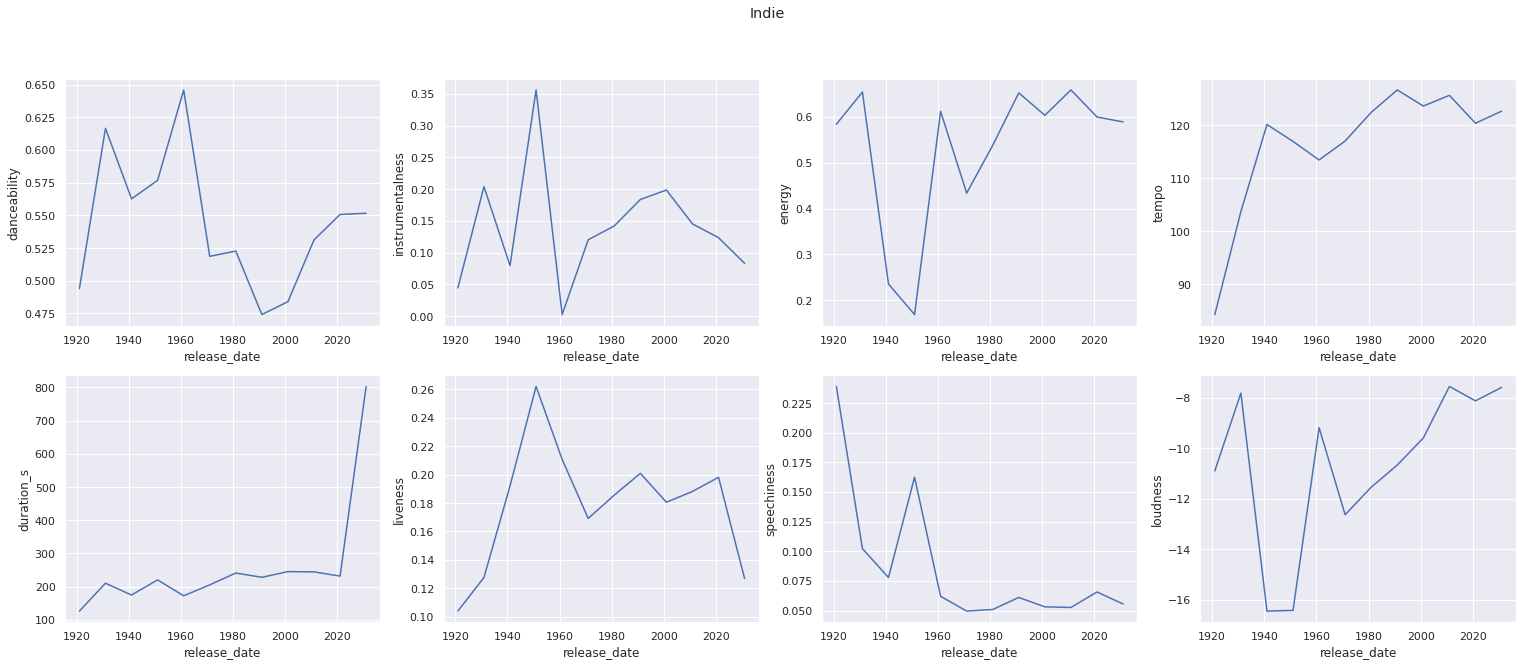

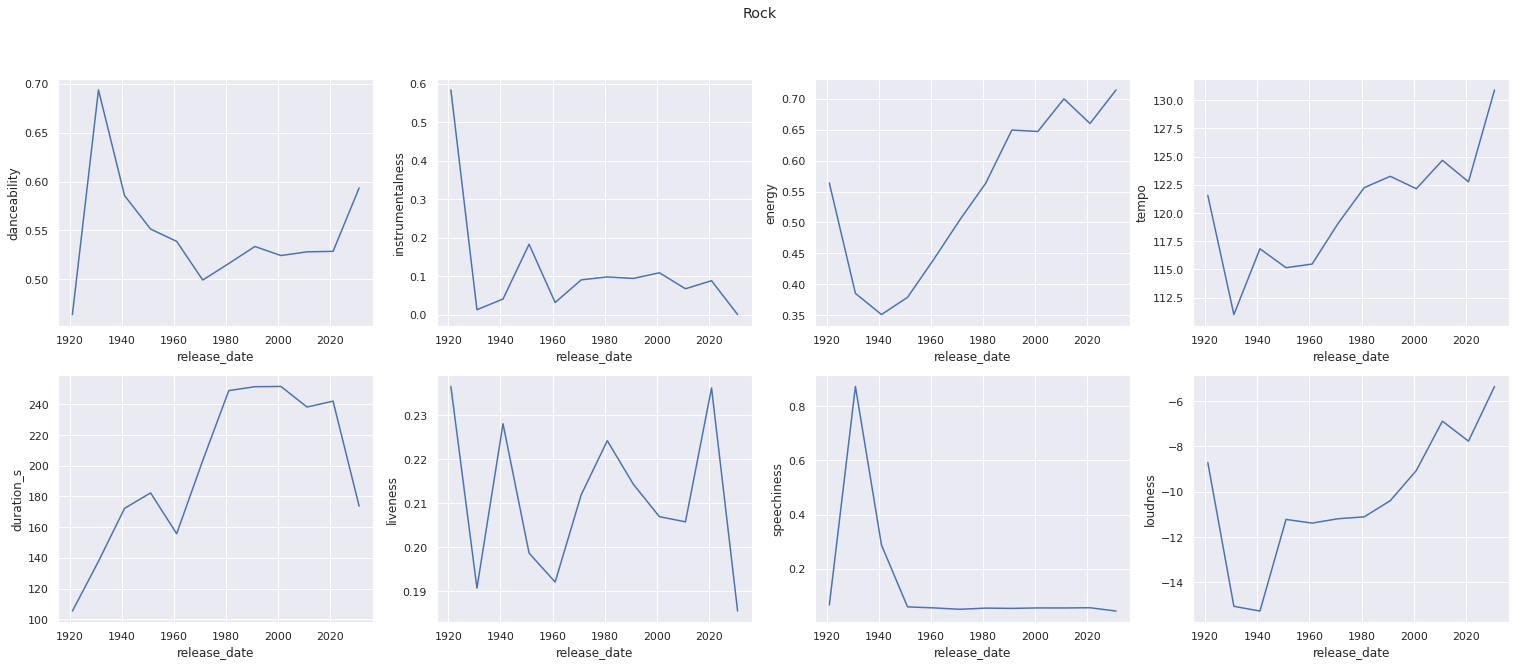

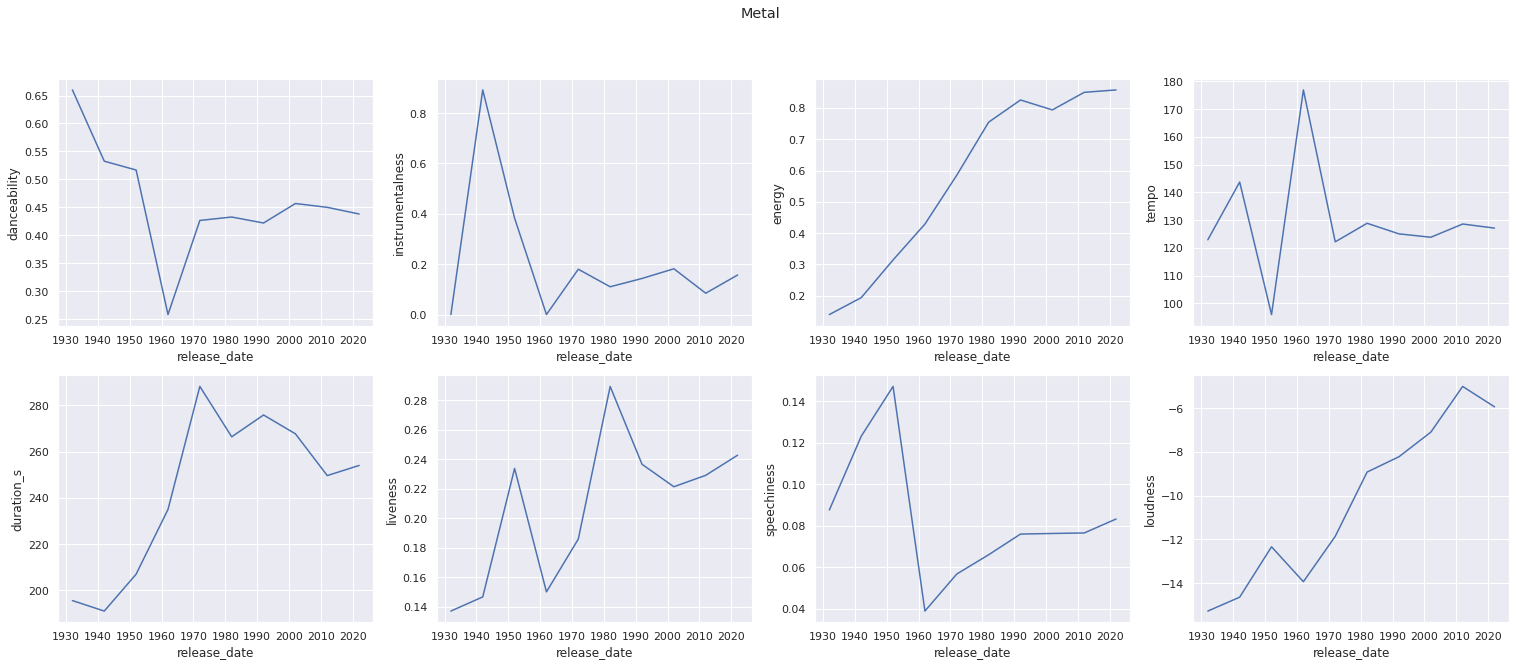

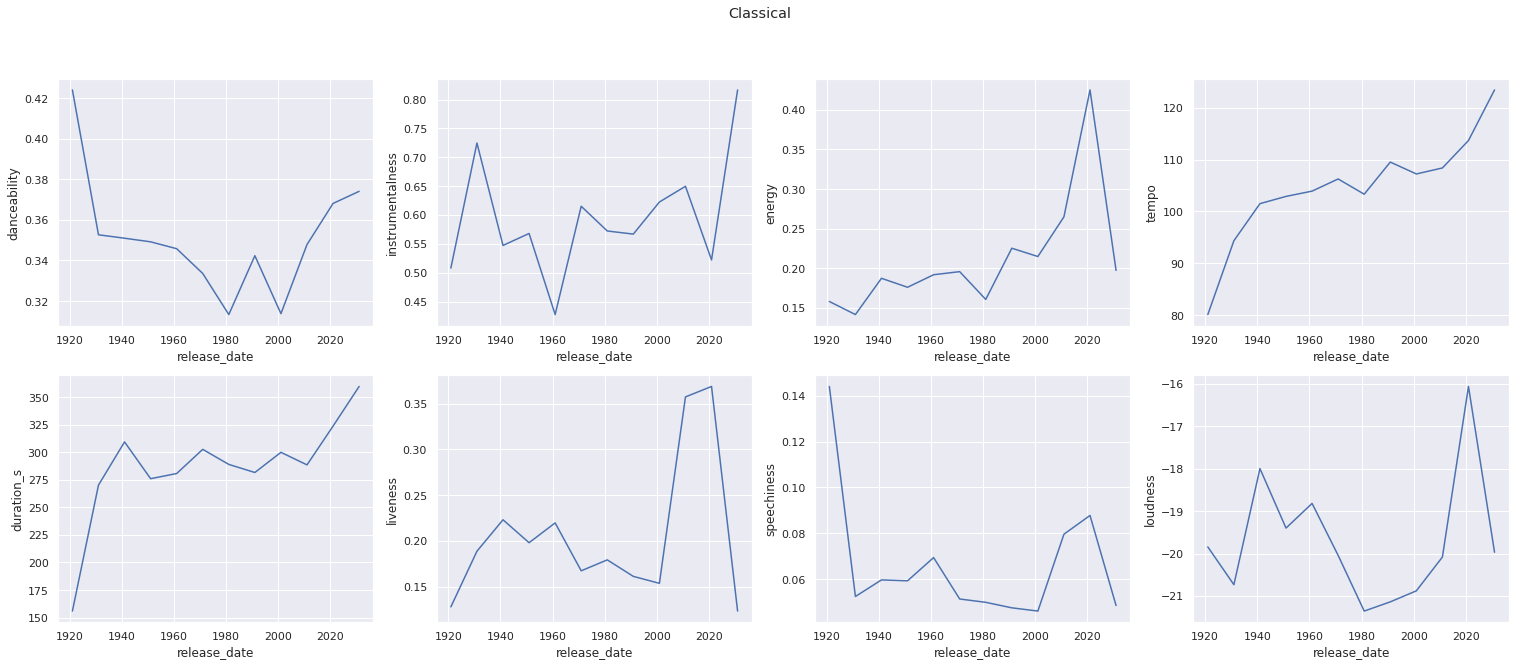

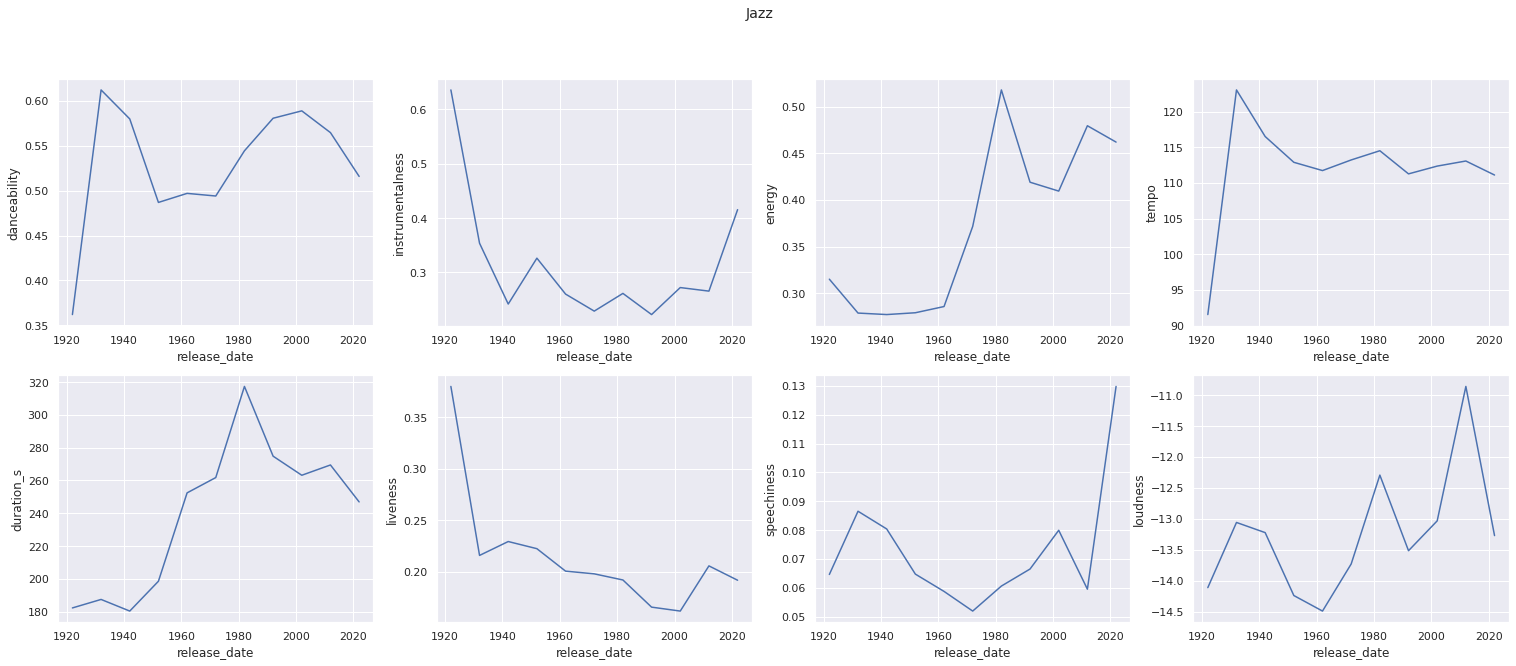

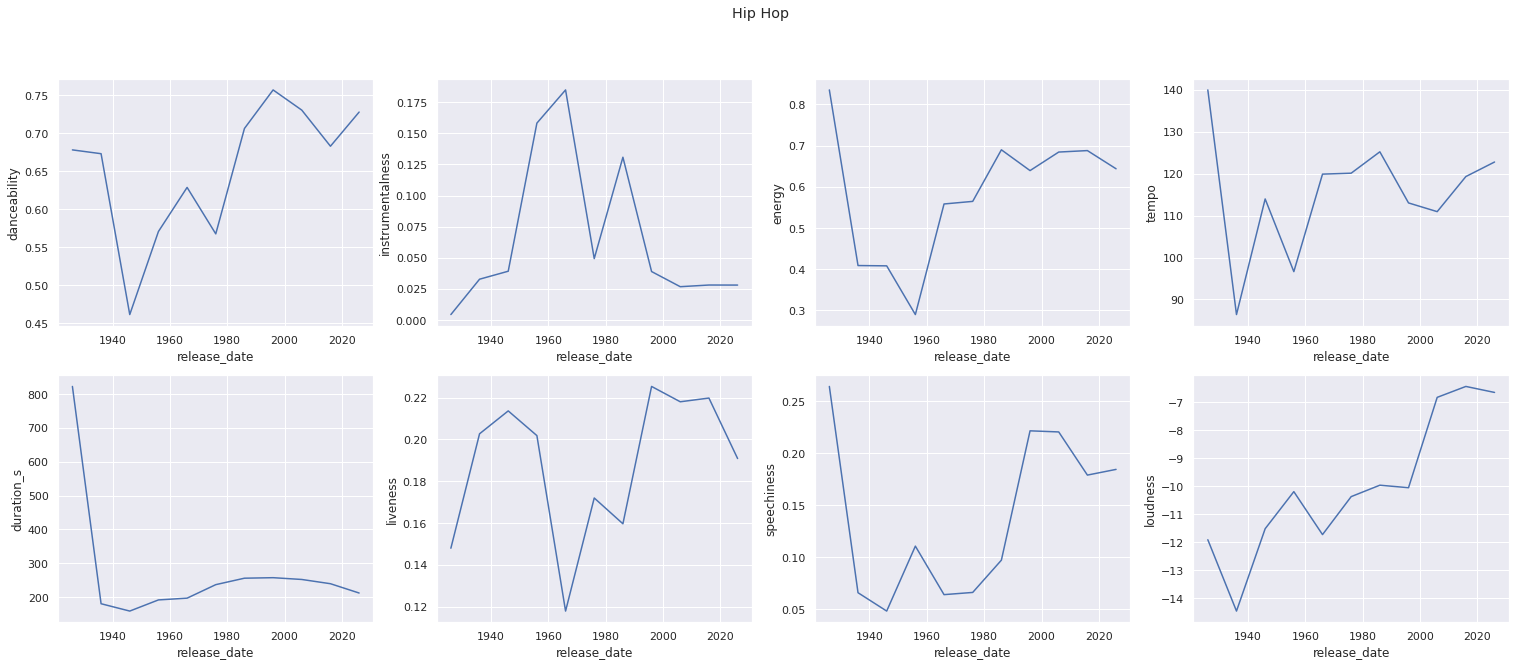

In [ ]:
genre_data = pd.DataFrame()
most_popular_genres = ["pop","indie","rock","metal","classical","jazz", "hip hop"]

for genre in most_popular_genres:
  single_genre= genre_df[genre_df.genres.str.contains(genre)].resample(rule='10A').mean().reset_index()
  
  #plot = sns.lineplot(data=single_genre, x="release_date", y="danceability_x")
  fig, axes = plt.subplots(2, 4, figsize=(26, 10))
  fig.suptitle(genre.title())
  
  sns.lineplot(ax=axes[0, 0], data=single_genre, x='release_date', y='danceability')
  sns.lineplot(ax=axes[0, 1], data=single_genre, x='release_date', y='instrumentalness')
  sns.lineplot(ax=axes[0, 2], data=single_genre, x='release_date', y='energy')
  sns.lineplot(ax=axes[1, 0], data=single_genre, x='release_date', y='duration_s')
  sns.lineplot(ax=axes[1, 1], data=single_genre, x='release_date', y='liveness')
  sns.lineplot(ax=axes[1, 2], data=single_genre, x='release_date', y='speechiness')
  sns.lineplot(ax=axes[0, 3], data=single_genre, x='release_date', y='tempo')
  sns.lineplot(ax=axes[1, 3], data=single_genre, x='release_date', y='loudness')

With graphical analysis it is easier to understand and interpret the relations between values of genres and decades. Few of the main takeaways are that tempo and energy of pop, metal and rock genres have increased throughout the years while speechiness has only increased in hip hop. Indie genre has a stable average of song lenght over the decades. This makes the indie music only genre that has a consistent song lenght compared to other genres. Also jazz and indie have no drastic changes in their average tempo over the decades.

## ***Comparison of features of sub-genres for selected parent genres over time periods***

In [ ]:
pop_df = genre_df[genre_df["genres"].str.contains("pop")].sort_values("popularity").tail(5)
indie_df =genre_df[genre_df["genres"].str.contains("indie")].sort_values("popularity").tail(5)
rock_df = genre_df[genre_df["genres"].str.contains("rock")].sort_values("popularity").tail(5)
metal_df = genre_df[genre_df["genres"].str.contains("metal")].sort_values("popularity").tail(5)
classical_df = genre_df[genre_df["genres"].str.contains("classical")].sort_values("popularity").tail(5)
hiphop_df = genre_df[genre_df["genres"].str.contains("hip hop")].sort_values("popularity").tail(5)
jazz_df = genre_df[genre_df["genres"].str.contains("jazz")].sort_values("popularity").tail(5)

####-Temporal Analysis of the Most Popular 3 Pop Subgenres

In [ ]:
pop_subgenres = []
for genre in pop_df['genres']: 
  splitted = genre[2:-2].split(",")
  for item in splitted:
    item = item.replace("'", "")
    item = item.strip()
    if item != "'" and item != "pop" and "pop" in item: 
      if item not in pop_subgenres:
        pop_subgenres.append(item)
print("The list of 3 most popular subgenres of the pop genre: ", pop_subgenres)

The list of 3 most popular subgenres of the pop genre:  ['dance pop', 'electropop', 'post-teen pop']


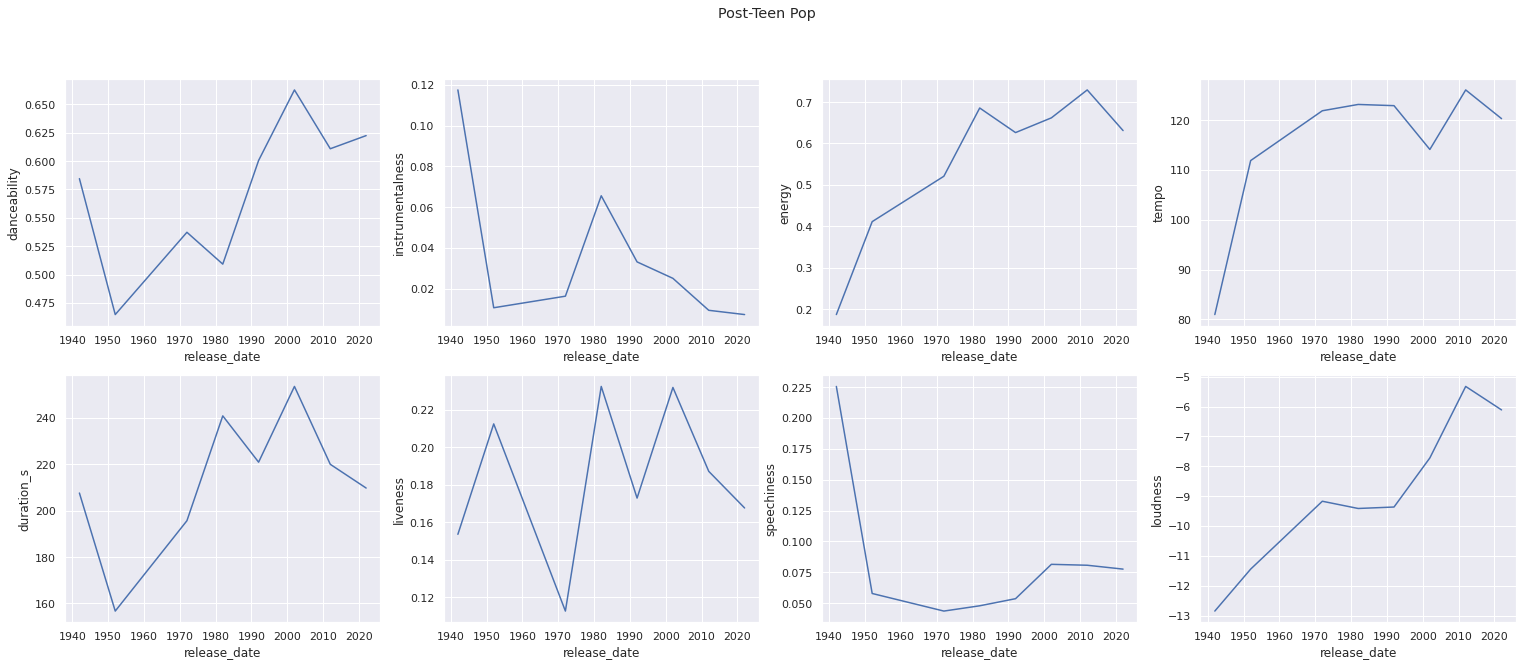

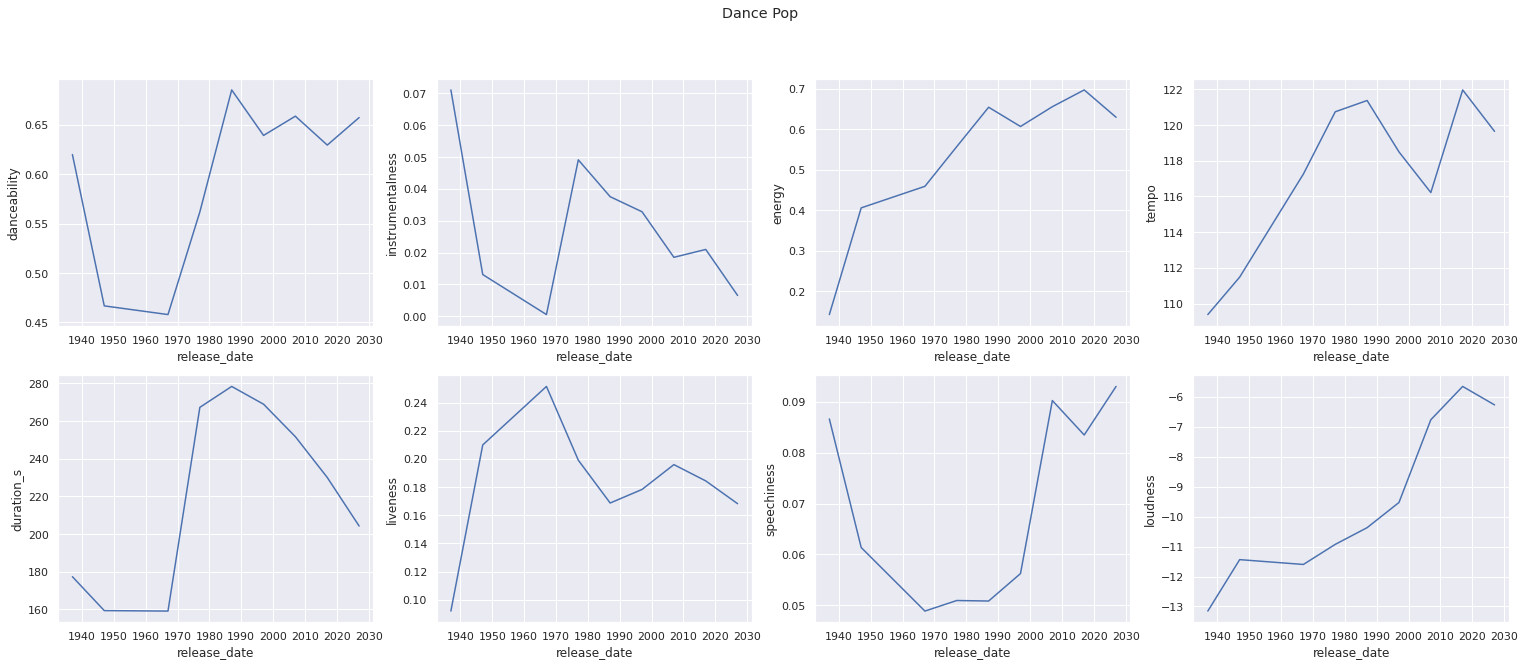

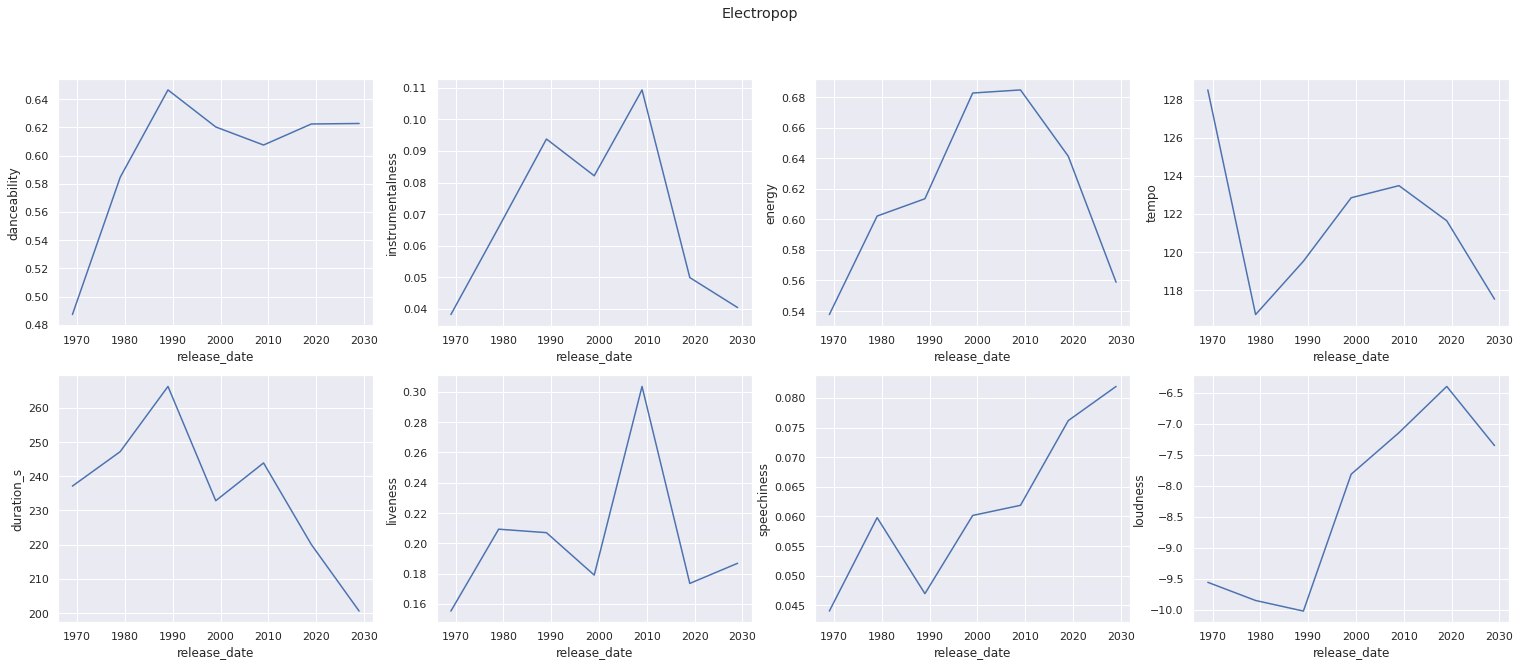

In [ ]:
pop_data = pd.DataFrame()
pop_popular_genres = ["post-teen pop", "dance pop", "electropop"]

for genre in pop_popular_genres:
  single_genre= genre_df[genre_df.genres.str.contains(genre)].resample(rule='10A').mean().reset_index()
  fig, axes = plt.subplots(2, 4, figsize=(26, 10))
  fig.suptitle(genre.title())
  
  sns.lineplot(ax=axes[0, 0], data=single_genre, x='release_date', y='danceability')
  sns.lineplot(ax=axes[0, 1], data=single_genre, x='release_date', y='instrumentalness')
  sns.lineplot(ax=axes[0, 2], data=single_genre, x='release_date', y='energy')
  sns.lineplot(ax=axes[1, 0], data=single_genre, x='release_date', y='duration_s')
  sns.lineplot(ax=axes[1, 1], data=single_genre, x='release_date', y='liveness')
  sns.lineplot(ax=axes[1, 2], data=single_genre, x='release_date', y='speechiness')
  sns.lineplot(ax=axes[0, 3], data=single_genre, x='release_date', y='tempo')
  sns.lineplot(ax=axes[1, 3], data=single_genre, x='release_date', y='loudness')

According to temporal analysis of the features, it is seen that the trends of different pop subgenres do not change accordingly. For instance, the energy of post-teen pop almost always have increased over decades whilst electropop decreased after 2010. 

We used data_w_genres.csv to get a more accurate information about temporal data about each genre type.

####-Temporal Analysis of the Most Popular 3 Pop Subgenres

In [ ]:
indie_subgenres = []
for genre in indie_df['genres']: 
  splitted = genre[2:-2].split(",")
  for item in splitted:
    item = item.replace("'", "")
    item = item.strip()
    if item != "'" and item != "indie" and "indie" in item: 
      if item not in indie_subgenres:
        indie_subgenres.append(item)
print("The list of 3 most popular subgenres of the indie genre: ", indie_subgenres)

The list of 3 most popular subgenres of the indie genre:  ['sheffield indie', 'indie pop', 'indie cafe pop']


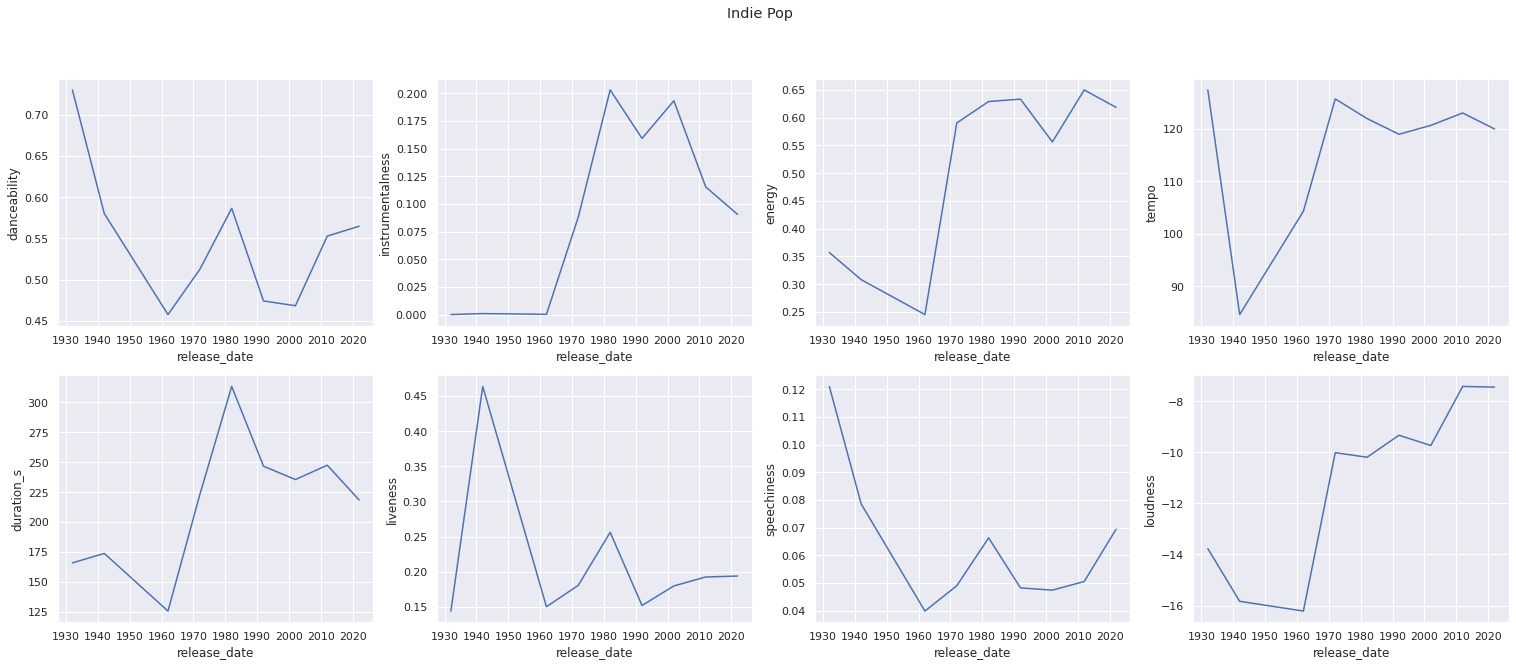

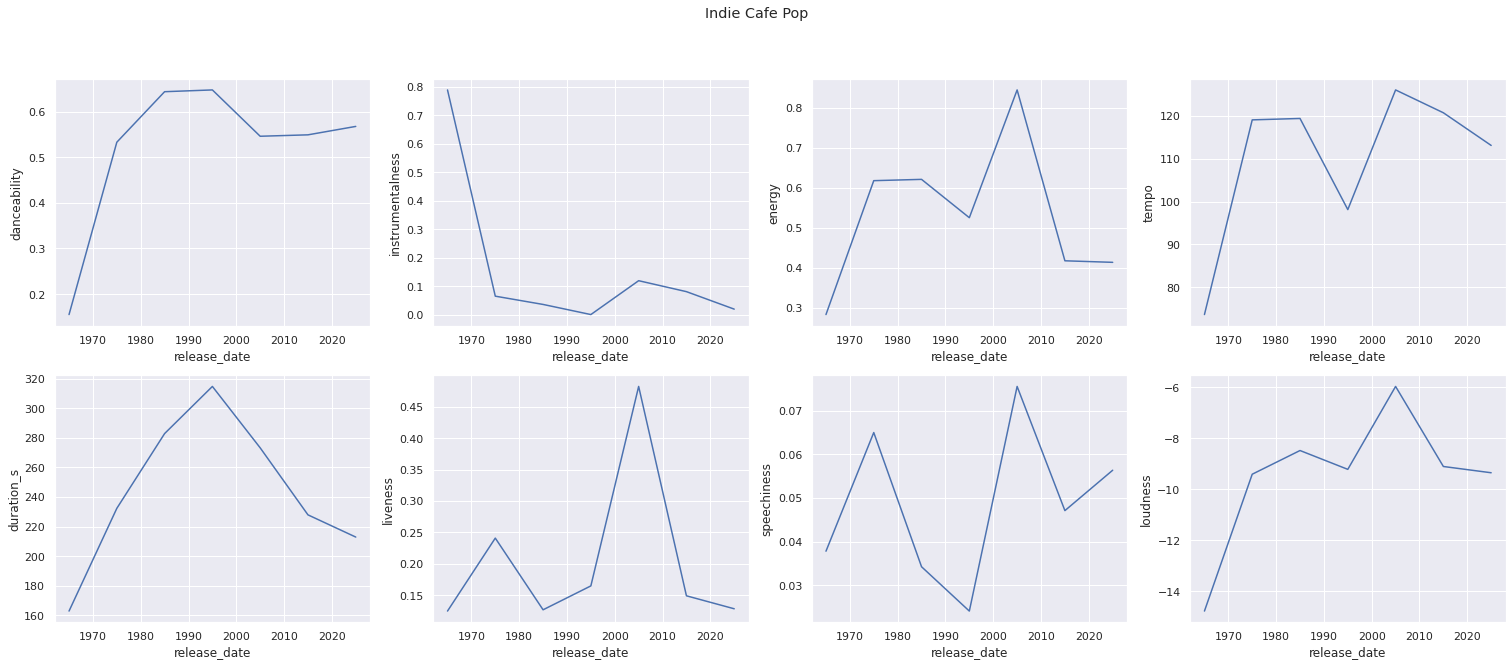

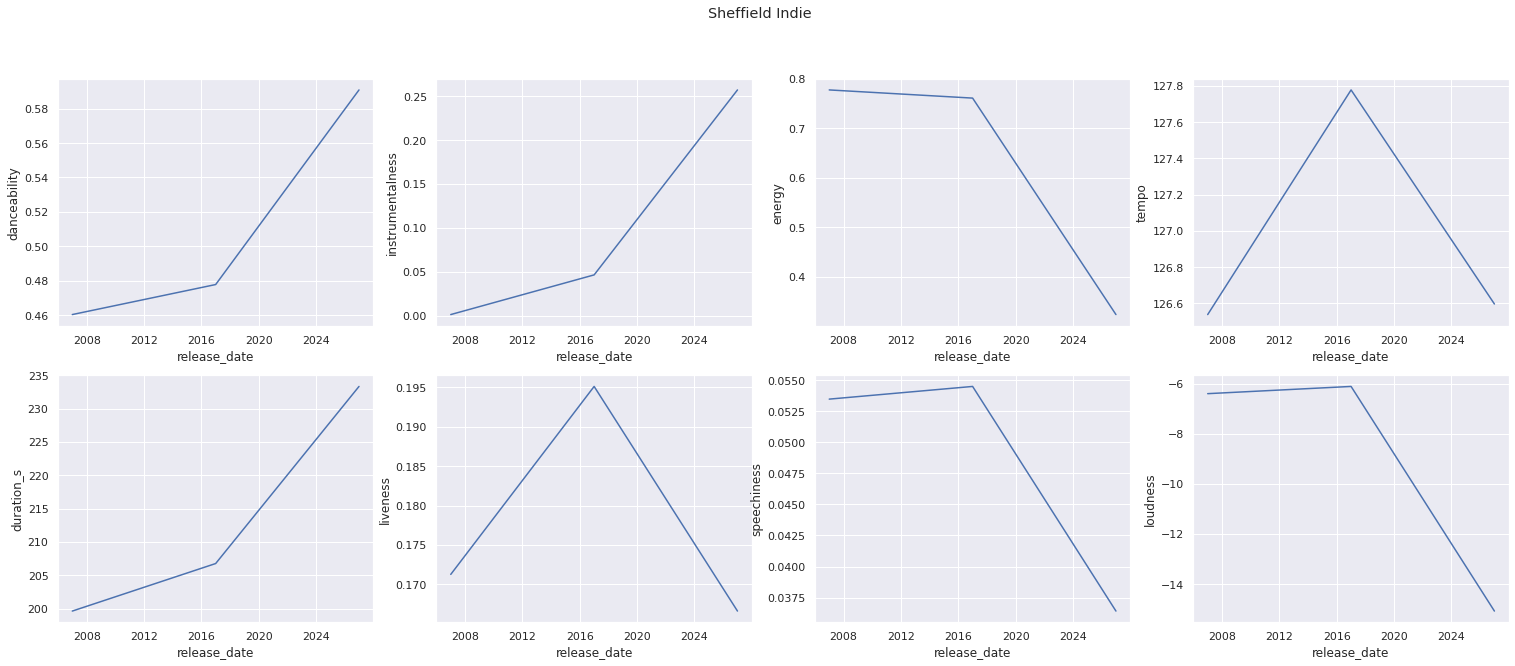

In [ ]:
indie_data = pd.DataFrame()
indie_popular_genres = [ "indie pop", "indie cafe pop", "sheffield indie"]

for genre in indie_popular_genres:
  single_genre= genre_df[genre_df.genres.str.contains(genre)].resample(rule='10A').mean().reset_index()
  fig, axes = plt.subplots(2, 4, figsize=(26, 10))
  fig.suptitle(genre.title())
  
  sns.lineplot(ax=axes[0, 0], data=single_genre, x='release_date', y='danceability')
  sns.lineplot(ax=axes[0, 1], data=single_genre, x='release_date', y='instrumentalness')
  sns.lineplot(ax=axes[0, 2], data=single_genre, x='release_date', y='energy')
  sns.lineplot(ax=axes[1, 0], data=single_genre, x='release_date', y='duration_s')
  sns.lineplot(ax=axes[1, 1], data=single_genre, x='release_date', y='liveness')
  sns.lineplot(ax=axes[1, 2], data=single_genre, x='release_date', y='speechiness')
  sns.lineplot(ax=axes[0, 3], data=single_genre, x='release_date', y='tempo')
  sns.lineplot(ax=axes[1, 3], data=single_genre, x='release_date', y='loudness')

Similar arguments to pop subgenres holds true for indie subgenres too. For instance, the liveness of subgenres indie-pop and indie cafe-pop are seen oppositely increased through decades.

####-Temporal Analysis of the Most Popular 3 Rock Subgenres



In [ ]:
rock_subgenres = []
for genre in rock_df['genres']: 
  splitted = genre[2:-2].split(",")
  for item in splitted:
    item = item.replace("'", "")
    item = item.strip()
    if item != "'" and item != "rock" and "rock" in item: 
      if item not in rock_subgenres:
        rock_subgenres.append(item)
print("The list of 3 most popular subgenres of the rock genre: ",rock_subgenres[:3])

The list of 3 most popular subgenres of the rock genre:  ['album rock', 'classic rock', 'soft rock']


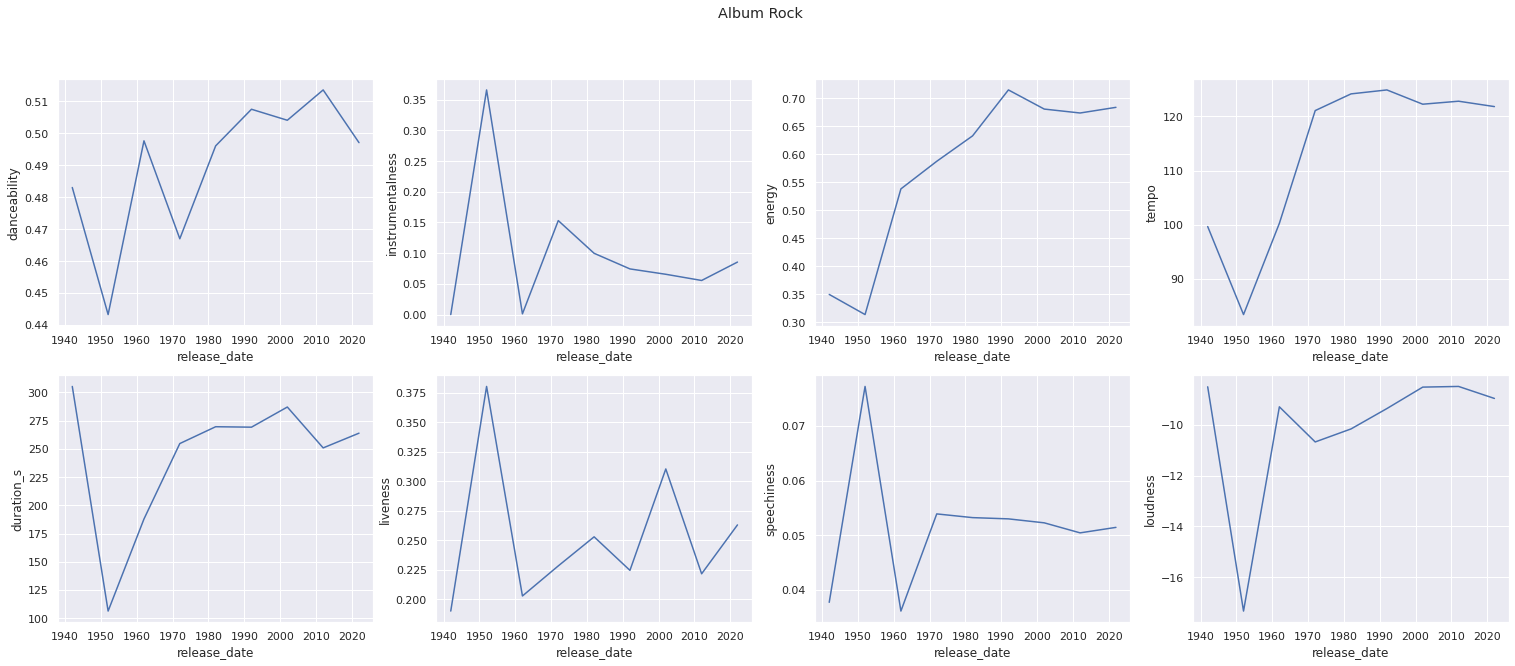

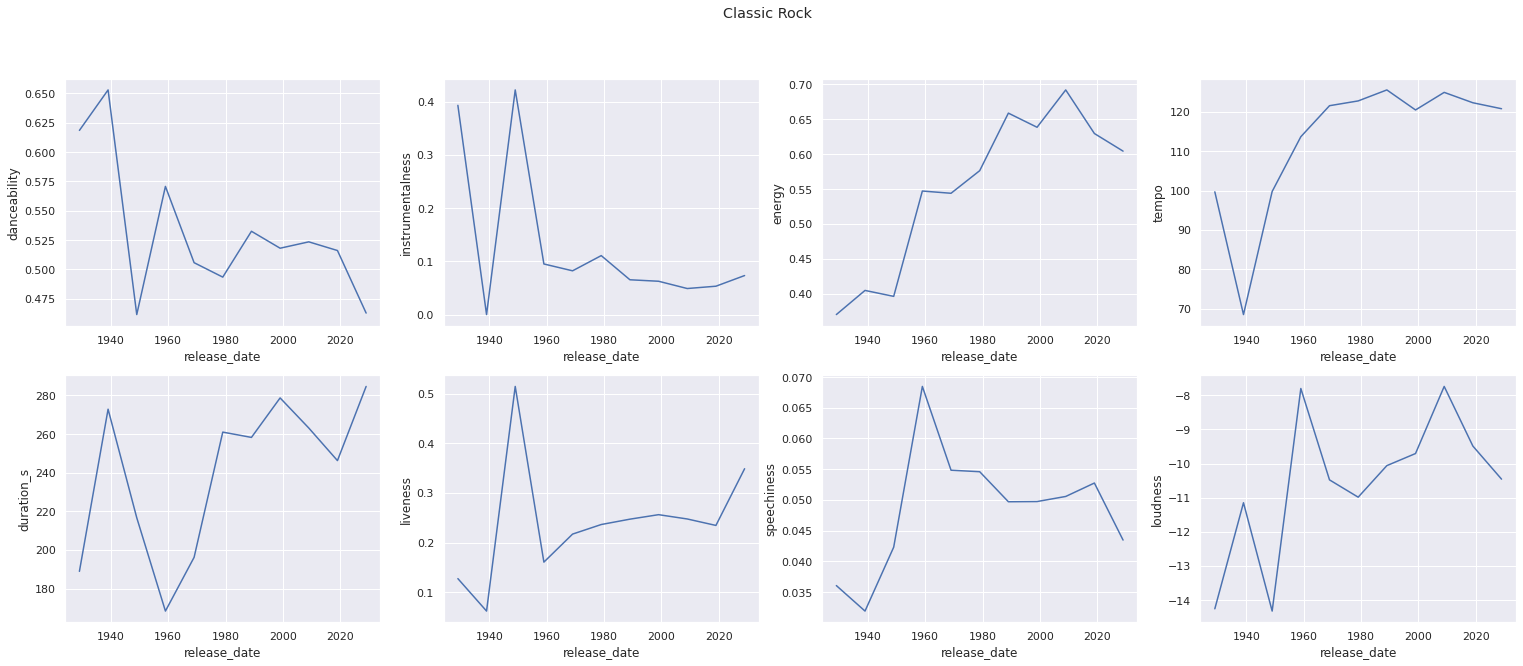

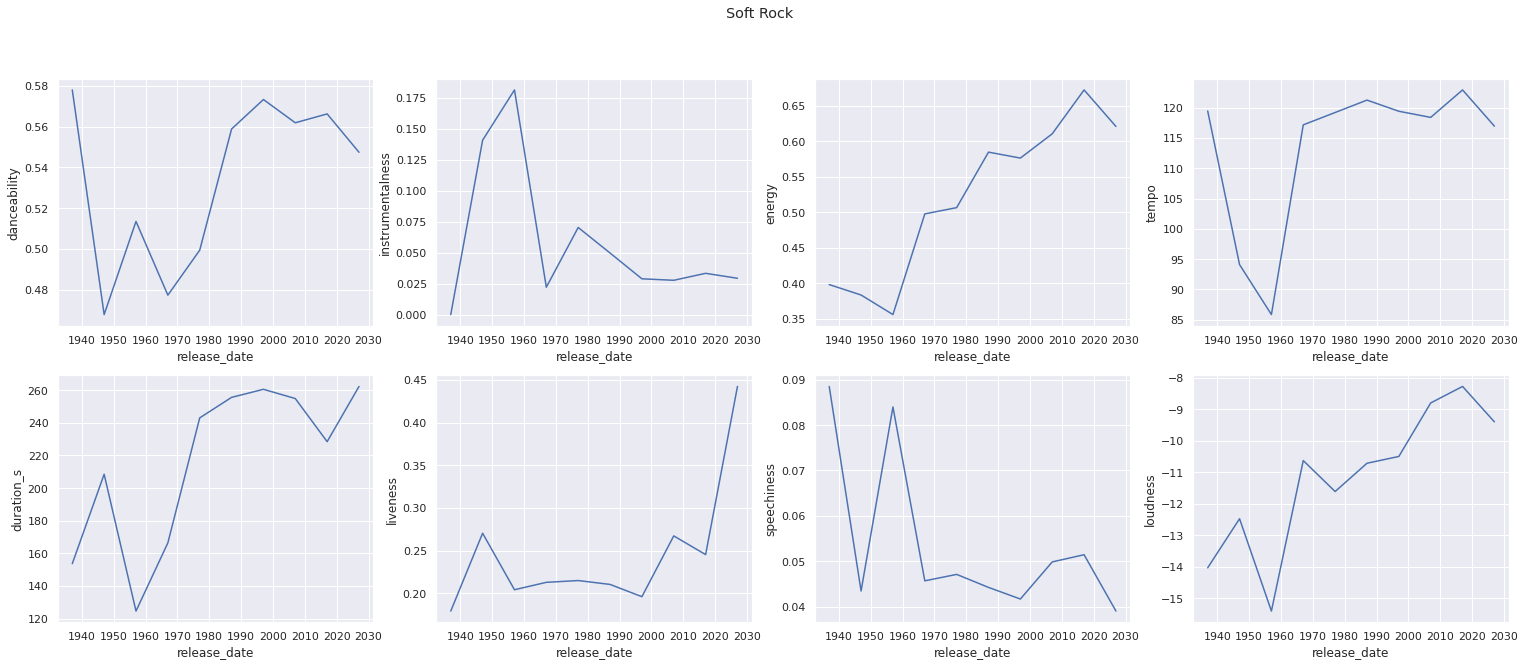

In [ ]:
rock_data = pd.DataFrame()
rock_popular_genres = ["album rock", "classic rock", "soft rock"]

for genre in rock_popular_genres:
  single_genre= genre_df[genre_df.genres.str.contains(genre)].resample(rule='10A').mean().reset_index()
  fig, axes = plt.subplots(2, 4, figsize=(26, 10))
  fig.suptitle(genre.title())
  
  sns.lineplot(ax=axes[0, 0], data=single_genre, x='release_date', y='danceability')
  sns.lineplot(ax=axes[0, 1], data=single_genre, x='release_date', y='instrumentalness')
  sns.lineplot(ax=axes[0, 2], data=single_genre, x='release_date', y='energy')
  sns.lineplot(ax=axes[1, 0], data=single_genre, x='release_date', y='duration_s')
  sns.lineplot(ax=axes[1, 1], data=single_genre, x='release_date', y='liveness')
  sns.lineplot(ax=axes[1, 2], data=single_genre, x='release_date', y='speechiness')
  sns.lineplot(ax=axes[0, 3], data=single_genre, x='release_date', y='tempo')
  sns.lineplot(ax=axes[1, 3], data=single_genre, x='release_date', y='loudness')

Even though there are different trends of changes still exists, it is seen that rock subgenres has changed more similarily through decades.

# **Statistical Analysis & Hypothesis Testing**

In this part of the study, we make hypotheses about the comparison of different properties and we try to find out whether these hypotheses are correct or not with different test methods.

## *Statistical tests to check how (or if) features contribute to popularity of songs*

We want to test whether the features of the songs contribute popularity. In order to understand whether we can reject our hypothesis, we used t-test to understand where the p value locates in the distributions of our values ​​and to say rejection or failing the rejecting accordingly. In the following four hypothesis, t-test is used.

P value method help us to support or reject the null hypothesis. The p value is an evidence to reject a null hypothesis. The smaller the p-value, the stronger the evidence so the null hypothesis is rejected.

**Significance level**: *0.05* since most of hypothesis tests assume significance level as 0.05.


In [ ]:
# Since we have presented 4 different hypotheses in this section, 
# we created a function to prevent repetition. 
# Thus, we will show different features with this function.

significance_level = 0.05
def hypothesisFunc(feature):
    df_h1 = data[[feature,"popularity"]]
    md_h1 = df_h1["popularity"].median()
    low_pop = df_h1[df_h1["popularity"] <= md_h1]
    high_pop = df_h1[df_h1["popularity"] > md_h1]
    ax = sns.kdeplot(low_pop[feature], shade=True, label = "Low Popularity")
    sns.kdeplot(high_pop[feature],  ax=ax, shade=True, label = "High Popularity")
    plt.legend()
    plt.show()
    low_list =[]
    high_list=[]
    for i in range (0,100):
        low_list.append(low_pop.sample(100)[feature].mean())
    for k in range (0,100):
        high_list.append(high_pop.sample(100)[feature].mean())
    t, p_value = stats.ttest_ind(a=low_list, b=high_list, equal_var=False)
    return t,p_value;

def checkHypo(t,p_value):
    print("Test statistic: ",format(t,".2E"))
    print("P value: ",format(p_value,".2E"))
    if p_value < significance_level:
        print("Null hypothesis rejected")
    else:
        print("Null hypothesis failed to reject")

###-Hypothesis 1


**Null Hypothesis ($H_0$)**: Danceability has no effect on popularity of songs.

**Alternative Hypothesis ($H_A$)**: Danceability contributes to popularity of the songs.




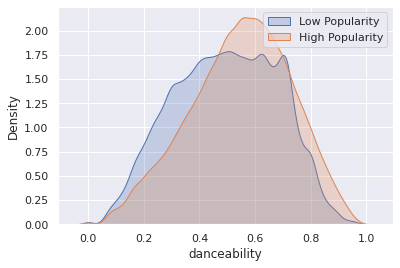

Test statistic:  -2.01E+01
P value:  3.64E-49
Null hypothesis rejected


In [ ]:
t_val, p_val = hypothesisFunc("danceability")
checkHypo(t_val,p_val)

Since the p value we found is lower than the significance level, we reject the Null Hypothesis. So we cannot say that danceability does not affect popularity. We found that this hypothesis was not correct. Danceability has contribution on popularity. We are getting closer to this hypothesis.

###-Hypothesis 2


**Null Hypothesis ($H_0$)**: Energy has no effect on popularity of songs.

**Alternative Hypothesis ($H_A$)**: Energy contributes to popularity of the songs.


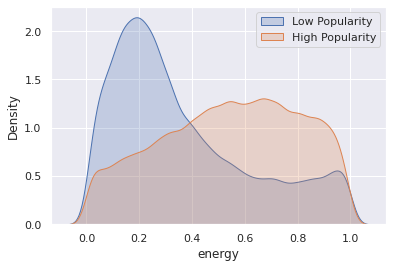

Test statistic:  -4.65E+01
P value:  1.97E-108
Null hypothesis rejected


In [ ]:
t_val2, p_val2 = hypothesisFunc("energy")
checkHypo(t_val2,p_val2)

Since the p value we found is lower than the significance level, we reject the Null Hypothesis. By reject the null hypothesis, we actually refute the claim that energy does not increase popularity.

###-Hypothesis 3


**Null Hypothesis ($H_0$)**: Key of the song has no effect on popularity.

**Alternative Hypothesis ($H_A$)**: Key of the song contributes to popularity.

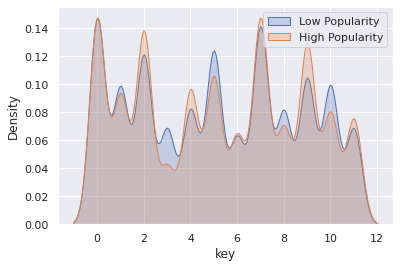

Test statistic:  -5.58E-01
P value:  5.77E-01
Null hypothesis failed to reject


In [ ]:
t_val3, p_val3 = hypothesisFunc("key")
checkHypo(t_val3,p_val3)

Here our p value is higher than the significance level. It means that we failed the reject the Null Hypothesis. What we said in the Null Hypothesis was key of the songs does not contribute to the popularity. So we cannot directly reject this so key may not affect popularity.

###-Hypothesis 4

**Null Hypothesis ($H_0$)**: Loudness has no effect on popularity.

**Alternative Hypothesis ($H_A$)**: Loudness contributes to popularity.

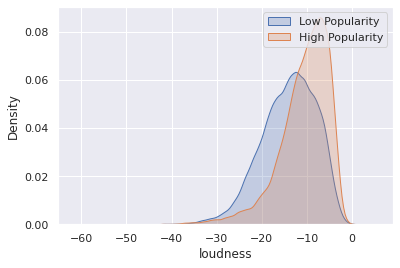

Test statistic:  -4.34E+01
P value:  7.06E-103
Null hypothesis rejected


In [ ]:
t_val4, p_val4 = hypothesisFunc("loudness")
checkHypo(t_val4,p_val4)

The null hypothesis argues that low popularity and high popularity come from the same distributions. So while we want to validate our alternative hypothesis, we want to see it come from different distributions. As we will see from the figure here, and as we will see in the test result, our null hypothesis becomes rejected, so we cannot say that loudness does not affect popularity at all. Loudness contributes to the popularity.

## *Statistical tests to check if significant differences exist between different eras*

We want to test whether there are big differences between the songs of the genre in differen eras. In order to understand whether we can reject our hypothesis, we decided to use **Two-Sample T-test** to understand whether the average difference between two groups is really significant or if it is due to random chance. Then we compared the resulting p value with the significance level to decide whether we reject or fail to reject the null hypothesis.

**Significance level**: *0.05* since most of hypothesis tests assume significance level as 0.05.


In [ ]:
significance = 0.05

In [ ]:
def two_sample_t_test(group1, group2):
  plist = stats.ttest_ind(group1, group2, equal_var=False)
  p_value = plist[1]
  print("p value is ", p_value)
  if p_value < significance:
    print("Null hypothesis rejected")
  else:
    print("Null hypothesis failed to reject")

In [ ]:
def plot_dist(group1, group2, name1, name2):
  ax = sns.kdeplot(group1, shade=True, label = name1)
  sns.kdeplot(group2,  ax=ax, shade=True, label = name2)
  plt.legend()
  plt.show()

###-Hypothesis 1

**Null Hypothesis ($H_0$)**: 90's Hip Hop is has the same energy compared to the 80's Hip Hop.

**Alternative Hypothesis ($H_A$)**: 90's Hip Hop has different energy than the 80's Hip Hop.

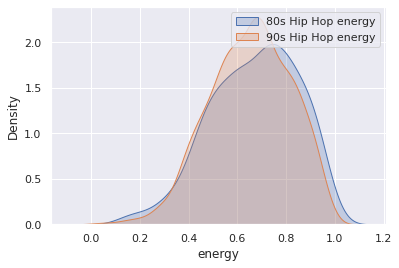

Mean value of energy of songs from 80s 0.67
Mean value of energy of songs from 90s 0.65
p value is  0.05317351094111224
Null hypothesis failed to reject


In [ ]:
hiphop_ds = genre_df[genre_df["genres"].str.contains("hip hop")]

# Keep the songs that are released in the eras we are analyzing
hiphop_90s_ds = hiphop_ds[hiphop_ds['year'].between(1990, 1999)]["energy"]
hiphop_80s_ds = hiphop_ds[hiphop_ds['year'].between(1980, 1989)]["energy"]

plot_dist(hiphop_80s_ds, hiphop_90s_ds, "80s Hip Hop energy", "90s Hip Hop energy")

print(f"Mean value of energy of songs from 80s {hiphop_80s_ds.mean():.2f}")
print(f"Mean value of energy of songs from 90s {hiphop_90s_ds.mean():.2f}")

two_sample_t_test(hiphop_80s_ds, hiphop_90s_ds)

Here our p value is higher than the significance level. It means that we failed the reject the Null Hypothesis. So we cannot directly reject that energy of hip hop songs in the given eras are the same.

###-Hypothesis 2

**Null Hypothesis ($H_0$)**: 60's Classical music has the same instrumentalness with 30's Classical music.

**Alternative Hypothesis ($H_A$)**: 60's Classical music has different instrumentalness than 30's Classical music.

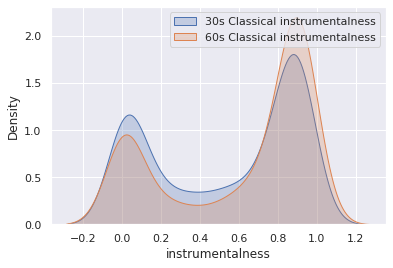

Mean value of instrumentalness of songs from 30s 0.54
Mean value of instrumentalness of songs from 60s 0.61
p value is  8.87489351146707e-06
Null hypothesis rejected


In [ ]:
classical_ds = genre_df[genre_df["genres"].str.contains("classical")]

# Keep the songs that are released in the eras we are analyzing
classical_60s_ds = classical_ds[classical_ds['year'].between(1960, 1969)]["instrumentalness"]
classical_30s_ds = classical_ds[classical_ds['year'].between(1930, 1939)]["instrumentalness"]

plot_dist(classical_30s_ds, classical_60s_ds, "30s Classical instrumentalness", "60s Classical instrumentalness")

print(f"Mean value of instrumentalness of songs from 30s {classical_30s_ds.mean():.2f}")
print(f"Mean value of instrumentalness of songs from 60s {classical_60s_ds.mean():.2f}")

two_sample_t_test(classical_60s_ds, classical_30s_ds)

Since the p value we found is lower than the significance level, we reject the Null Hypothesis. So we cannot say that instumentalness of classical music has not changed considering the given eras. We found that this hypothesis was not correct. In addition, the test score is positive which indicates that the instrumentalness mean for songs in the 60s is higher than instrumentalness mean for songs in the 30s.

###-Hypothesis 3

**Null Hypothesis ($H_0$)**: 2010's pop music and 90's pop music are equally explicit.

**Alternative Hypothesis ($H_A$)**: 2010's pop music is different explicit than 90's pop music.

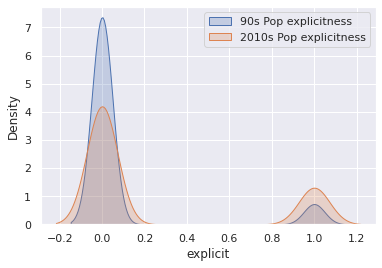

Mean value of explicitness of pop songs from 90s 0.09
Mean value of explicitness of pop songs from 2010s 0.24
p value is  9.772148264938967e-122
Null hypothesis rejected


In [ ]:
pop_ds = genre_df[genre_df["genres"].str.contains("pop")]

# Keep the songs that are released in the eras we are analyzing
pop_90s_ds = pop_ds[pop_ds['year'].between(1990, 1999)]["explicit"]
pop_10s_ds = pop_ds[pop_ds['year'].between(2010, 2019)]["explicit"]

plot_dist(pop_90s_ds, pop_10s_ds, "90s Pop explicitness", "2010s Pop explicitness")

print(f"Mean value of explicitness of pop songs from 90s {pop_90s_ds.mean():.2f}")
print(f"Mean value of explicitness of pop songs from 2010s {pop_10s_ds.mean():.2f}")

two_sample_t_test(pop_90s_ds, pop_10s_ds)    

Since the p value we found is lower than the significance level, we reject the Null Hypothesis. So we cannot say that explicitness of pop songs has not changed considering the given eras. We found that this hypothesis was not correct.

## *Statistical tests on sub-genres*

At this part we want to test whether the features of subgenres of same parent genre vary or not.

We will use ANOVA test since we want to compare more than 2 samples, various subgenres. ANOVA test is used to test whether the sample results are significant or not. The significance of the ANOVA test comes from its ability to test 3 or more datasets together.

Again, we will take 0.05 as significance value and compare it to p-value obtained by computations to reject or accept the null hypothesis.

In [ ]:
def anova_test(sample1_name, sample2_name, sample3_name, feature):
  sample1 = genre_df[genre_df.genres.str.contains(sample1_name)][feature]
  sample2 = genre_df[genre_df["genres"].str.contains(sample2_name)][feature]
  sample3 = genre_df[genre_df["genres"].str.contains(sample3_name)][feature]
  f_stats, p_values = f_oneway(sample1, sample2, sample3)

  fig, ax = plt.subplots(1, 4, figsize=(14,5))
        
  sample1.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="b", density=True, log=True)
  ax[0].set_title(sample1_name)

  sample2.plot(kind="hist", ax=ax[1], bins=20, label="none", color="g", density=True, log=True)
  ax[1].set_title(sample2_name)

  sample3.plot(kind="hist", ax=ax[2], bins=20, label="none", color="r", density=True,log=True)
  ax[2].set_title(sample3_name)

  sns.kdeplot(sample1, shade=True, label =sample1_name, ax=ax[3], color="b")
  sns.kdeplot(sample2, shade=True, label=sample2_name, ax=ax[3], color="g")
  sns.kdeplot(sample3, shade=True, label=sample3_name, ax=ax[3], color="r")
  plt.yscale('log')
  
  ax[3].set_title("Comparison with KDE")
  plt.suptitle("Instrumentalness Distributions")
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

  print("p value is ", p_values, "from the ANOVA test.")

  if p_values < significance_level:
    print("Null hypothesis is rejected.")
  else:
    print("Null hypothesis cannot be rejected.")

###-Hypothesis 1


Since the status quo is all subgenres of a parent genre have the same feature values, the reliability of this assumption is going to be tested on the instrumentalness values of most popular rock subgenres.


**Null Hypothesis ( $𝐻_0$ ):** Subgenres of rock parent genre, classic rock, album rock and soft rock, have same instrumentalness values.

**Alternative Hypothesis ( $𝐻_𝐴$ ):** Subgenres of rock parent genre, classic rock, album rock and soft rock, have different instrumentalness values.

In [ ]:
rock_popular_genres

['album rock', 'classic rock', 'soft rock']

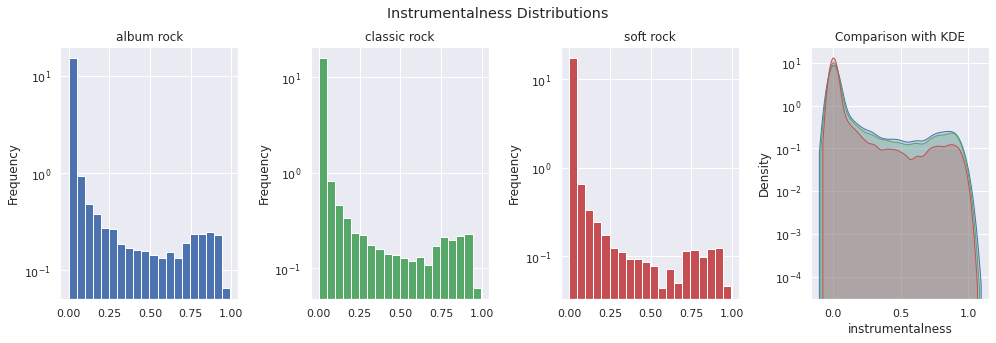

p value is  7.59792365783494e-74 from the ANOVA test.
Null hypothesis is rejected.


In [ ]:
anova_test("album rock", "classic rock", "soft rock",'instrumentalness' )

We see that the p-value is lower than the significance level; so, we reject the null hypothesis. We may say that the instrumentalness of rock subgenres classic rock, soft rock and album rock vary.

###-Hypothesis 2

At this part, we will test the status quo - all subgenres of a parent genre have the same feature values- on the pop subgenres using ANOVA test and 0.05 significance level because of the same reasons.

Three similar distributed popular pop subgenres, post-teen pop, electropop and dance pop, on energy feature are going to be tested.

**Null Hypothesis ( $𝐻_0$ ):** Subgenres of pop parent genre, post-teen pop, electropop and dance pop, have same energy values.

**Alternative Hypothesis ( $𝐻_𝐴$ ):** Subgenres of pop parent genre, post-teen pop,electropop and dancepop, have different energy values.

In [ ]:
pop_popular_genres

['post-teen pop', 'dance pop', 'electropop']

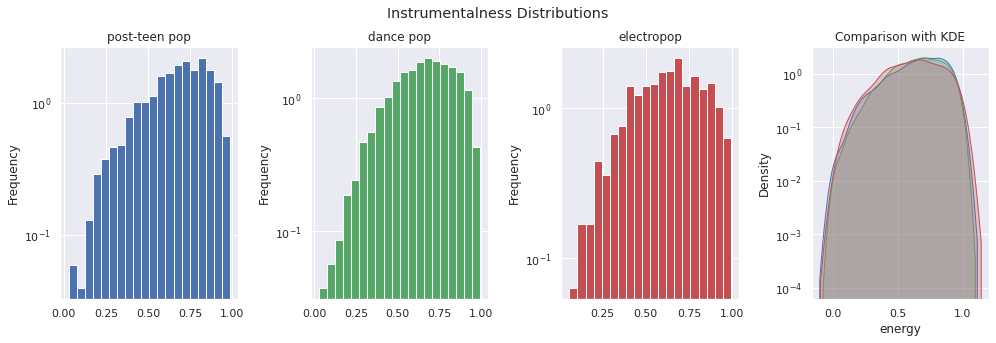

p value is  1.4245535495516534e-05 from the ANOVA test.
Null hypothesis is rejected.


In [ ]:
anova_test("post-teen pop", "dance pop", "electropop",'energy' )

We see that the p-value is lower than the significance level; so, we reject the null hypothesis. We may say that the energy of pop subgenres electro pop and dance pop vary.


###-Hypothesis 3

Lastly, the status quo is going to be tested on indie parent genre. For this test, we will use ANOVA test and significance level 0.05.

The liveness of most popular indie subgenres sheffield indie, indie pop and indie cafe pop are going to be tested this time.

**Null Hypothesis ( $𝐻_0$ ):** Subgenres of indie parent genre, Sheffield indie, indie pop and indie cafe pop, have same liveness values.

**Alternative Hypothesis ( $𝐻_𝐴$ ):** Subgenres of indie parent genre, Sheffield indie, indie pop and indie cafe pop,  have different liveness values.

In [ ]:
indie_popular_genres

['indie pop', 'indie cafe pop', 'sheffield indie']

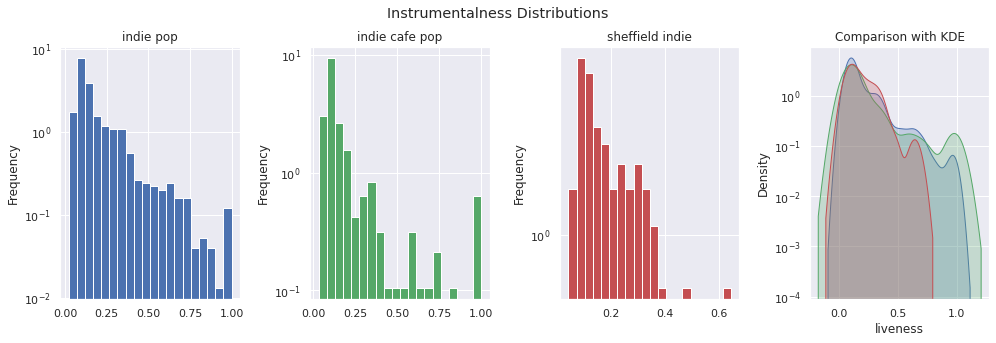

p value is  0.9408377489463086 from the ANOVA test.
Null hypothesis cannot be rejected.


In [ ]:
anova_test("indie pop", "indie cafe pop", "sheffield indie",'liveness' )

At this test we see that the p-value is higher than the significance level; so, we cannot reject the null hypothesis. We cannot reject that the indie pop, sheffield indie and indie cafe pop have the same liveness values.



# **Machine Learning**

In the last part of our project, we are making popularity prediction by using various machine learning models such as Linear Regression, kNN, Random Forest and Decision Tree. We do hyperparameter tuning to increase the performance of these models we have created. 

Also this part includes a simple song recommendation system which takes a song from user and gives other songs the user may like. Lastly, there is a song clustering based on available features and it is aimed to relate them with existing genres. 

In [ ]:
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm

## *Prediction of song popularity with machine learning models*

###-Linear Regression

A statistical model that that examines the linear relationship between two or more variables. In this part both linear regression and multiple linear regression were used.


----------------------------
Danceability vs Popularity
Linear Model score: 0.01578 
Mean Square Error: 474.84155
Mean Absolute Error: 18.73100


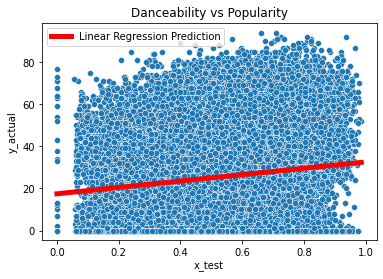

----------------------------
Energy vs Popularity
Linear Model score: 0.11039 
Mean Square Error: 429.19389
Mean Absolute Error: 17.42059


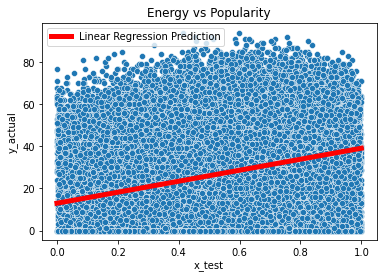

----------------------------
Valence vs Popularity
Linear Model score: 0.00421 
Mean Square Error: 480.42431
Mean Absolute Error: 18.82157


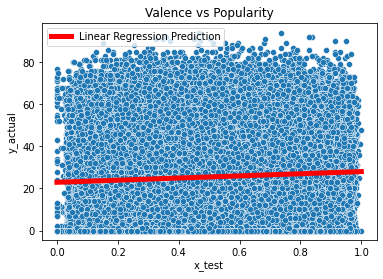

----------------------------
Acousticness vs Popularity
Linear Model score: 0.15999 
Mean Square Error: 405.26451
Mean Absolute Error: 16.60172


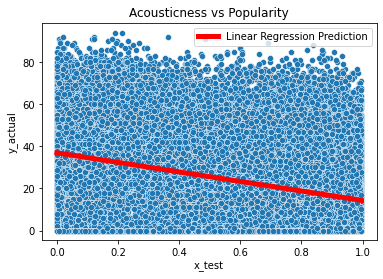

In [ ]:
def linear_regression(featurePlace, featureName):
    #data is cleaned before, i.e. null values
    print("----------------------------")
    print(featureName + " vs Popularity")
    linearModel = LinearRegression()
    X = data.iloc[:,featurePlace].values #taking danceability values
    y = data.iloc[:,13].values #taking popularity values

    #reshaping the data because it is expected by program
    X=X.reshape(-1, 1) 
    y=y.reshape(-1, 1)

    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

    #training of model using data examples
    linearModel.fit(X_train, y_train) 

    print("Linear Model score: {0:.5f} ".format(linearModel.score(X_test, y_test)))
    y_predict = linearModel.predict(X_test)

    #Remainder: Low error values ==> Good performing model
    meanError = mean_squared_error(y_predict, y_test)
    print("Mean Square Error: {0:.5f}".format(meanError))
    meanAbs = mean_absolute_error(y_test, y_predict)
    print("Mean Absolute Error: {0:.5f}".format(meanAbs))

    dataLast= pd.DataFrame(data={ 'x_test': X_test.flatten(),'y_actual': y_test.flatten(),'y_predict': y_predict.flatten() })
    sns.scatterplot(x="x_test", y="y_actual", data=dataLast)
    sns.lineplot(x="x_test", y="y_predict", data=dataLast, color ="red", label = "Linear Regression Prediction", linewidth=5)

    plt.title(featureName +" vs Popularity")
    plt.show()

#danceability vs popularity
linear_regression(2, "Danceability")

#energy vs popularity
linear_regression(4,"Energy")

#Valence vs popularity
linear_regression(17,"Valence")

#Acousticness vs popularity
linear_regression(0,"Acousticness")

The effect of different features on popularity has been observed above. Danceability and energy seem to be directly proportional to popularity. However, this ratio cannot be said to be very precise, and when looking at the mean error values, it is understood that the error is quite high. So we cannot say much about the precision of this model. 

Likewise, we can say that we cannot predict popularity with valence value.

It can also be observed that there is a negative relationship between acousticness and popularity and our model use this relationship, but again, it cannot be said that we can reach a definite conclusion since the value of error is high. 

**Multiple Linear Regression:**

Rather than using models that compare many different features one by one, a single model can be created with multiple linear regression and a conclusion can be drawn from it.

In [ ]:
#Multiple Linear Regression

features = ['energy','danceability','loudness','acousticness','valence','liveness']
x=data.loc[:,['energy','danceability','loudness','acousticness','valence','liveness']].values
y=data.loc[:,'popularity'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
lr = LinearRegression()
lr.fit(X_train, y_train)

co_data = pd.DataFrame(lr.coef_, features, columns=['Coefficient Value'])  
co_data

Coefficient Value
energy                -7.331675
danceability           0.152327
loudness               0.910995
acousticness         -19.654477
valence               -3.121431
liveness             -11.178732

In [ ]:
y_pred = lr.predict(X_test)
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
print("Mean absolute error: {}".format(mean_absolute_error(y_test, y_pred)))
print("Root mean square error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean squared error: 387.1923569859659
Mean absolute error: 16.174653500880858
Root mean square error: 19.67720399309734


Again, we see that mean error values are quite high.

In [ ]:
lr_acc = lr.score(X_test,y_test)
print("Accuracy of Linear Regression: "+str(lr_acc))

Accuracy of Linear Regression: 0.19501080118021996



In the next steps, we will look our accuracy with different models.

###-k-Nearest Neighbors

Here, kNN method is used to predict song popularity by using some features. In the previous section we reserved our data for training and testing. This time we will allocate data for validation in addition to training and testing. Training data and test data are used for the actual machine learning parts and validation data is used to check the process of learning's results. Let's use kNN method and see if our model is accurate enough.

In [ ]:
features = ['energy','danceability','loudness','acousticness','valence','liveness']

# 80% for training and 20% for testing-validation
trainData = data.sample(frac = 0.8,random_state = 420)
X_train = trainData[features]
y_train = trainData['popularity']
X_test = data.drop(trainData.index)[features]
#We add a validation dataset with train_test_split method
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)


knnModel = KNeighborsClassifier()
knnModel.fit(X_train, y_train)
knn_pred = knnModel.predict(X_valid)
knn_acc = accuracy_score(y_valid, knn_pred)
print("Accuracy of kNN: " + str(knn_acc))

Accuracy of kNN: 0.20768376160269506


Our accuracy score, which we obtained with KNN, turned out to be something like 0.20. This value cannot be said to be too high. Our model has low accuracies. We will be dealing with hyperparameters in the next steps to improve this model's performance and to ensure higher accuracy.

###-Decision Tree

Another model is Decision Tree.

In [ ]:
#previous data split is being used...

treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)
tree_pred = treeModel.predict(X_valid)
tree_acc = accuracy_score(y_valid, tree_pred)
print("Accuracy of Decision Tree: " + str(tree_acc))

Accuracy of Decision Tree: 0.14625667490950794


###-Random Forest


In [ ]:
forestModel = RandomForestClassifier()
forestModel.fit(X_train, y_train)
forest_pred = forestModel.predict(X_valid)
forest_acc = accuracy_score(y_valid, forest_pred)
print("Accuracy of Random Forest: " + str(forest_acc))

Accuracy of Random Forest: 0.2294018564312081


###-All in one

In [ ]:
allOne = pd.DataFrame({'Model': ['Linear Regression', 'KNN', 'Decision Tree','Random Forest'],'Accuracy': [lr_acc, knn_acc, tree_acc, forest_acc]})
allOne.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy
3      Random Forest  0.229402
1                KNN  0.207684
0  Linear Regression  0.195011
2      Decision Tree  0.146257

As we can see from the accuracy values ​​of all these models, the values ​​are quite low even though we do data cleaning at first. Therefore, we proceeded through the data we had cleaned ourselves. Now let's see if we can increase these accuracy values ​​with hyperparameter tuning.

Although the results were low, we expected the random forest's accuracy to be higher than that of the decision tree because random forest was created to solve problems in the decision tree. So, we can see it.

## *Hyper-parameter tuning to increase the performance of models*

The accuracy of the model changes by changing the hyperparameters. We are trying to achieve the combination that will return the maximum performance with Hyperparameter tuning.

Let's first look our **k-Nearest Neighbors** model. Here k is the hyper-parameter. 

In [ ]:
best= -1
bestindex = -1
#you can extend the range
rangex=1
rangey=20
for i in range(rangex,rangey):
    knn2 = KNeighborsClassifier(n_neighbors=i) # hyperparameter is set before the training.
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_valid)
    print("Accuracy of KNN with k = " + str(i) +": " + str(metrics.accuracy_score(y_valid, y_pred)))
    if metrics.accuracy_score(y_valid, y_pred) > best:
        best = metrics.accuracy_score(y_valid, y_pred)
        bestindex = i

print("--------")
print("Best accuracy in range [" + str(rangex) +"," +str(rangey-1) + "] is " + str(best) + " at index: " + str(bestindex))

Accuracy of KNN with k = 1: 0.14496649105830914
Accuracy of KNN with k = 2: 0.1813066695337419
Accuracy of KNN with k = 3: 0.19456689244884062
Accuracy of KNN with k = 4: 0.2031322796831882
Accuracy of KNN with k = 5: 0.20768376160269506
Accuracy of KNN with k = 6: 0.20883059169264953
Accuracy of KNN with k = 7: 0.2109808981113142
Accuracy of KNN with k = 8: 0.21230692040282406
Accuracy of KNN with k = 9: 0.21291617388811238
Accuracy of KNN with k = 10: 0.21538902626957676
Accuracy of KNN with k = 11: 0.21517399562771028
Accuracy of KNN with k = 12: 0.21653585635953124
Accuracy of KNN with k = 13: 0.2175393326882414
Accuracy of KNN with k = 14: 0.2186503243378848
Accuracy of KNN with k = 15: 0.21958212378597283
Accuracy of KNN with k = 16: 0.220119700390639
Accuracy of KNN with k = 17: 0.22076479231623838
Accuracy of KNN with k = 18: 0.22133820736121565
Accuracy of KNN with k = 19: 0.22144572268214888
--------
Best accuracy in range [1,19] is 0.22144572268214888 at index: 19


What we can understand from here is that the accurcy of our model increases as we increase the hyper-parameter k. For example in our previous KNN model our accuracy was 0.20 but now we can see that it is above the 0.20 and if we increase the k value the model's accuracy will increase.

We can also use **GridSearchCV** to find the best parameter from listed hyper-parameters. This function helps to loop through predefined hyperparameters.

In [ ]:
#GridSearchCV

grid = {'n_neighbors': np.arange(1,25)}
knn3 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn3, grid,cv=3) 
knn_cv.fit(X_train, y_train)
print("Hyper-parameter tuning with k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Hyper-parameter tuning with k: {'n_neighbors': 24}
Best accuracy: 0.22267220822727807


We can say that the values ​​are very close to each other.

Now let's move on to the **Decision Tree**:

In [ ]:
best_tree = -1
bestindex_tree = -1
for k in range(1,25):
  tree= DecisionTreeClassifier(criterion='entropy', max_depth=k)
  tree.fit(X_train,y_train)
  tree_pred= tree.predict(X_valid)
  accur= metrics.accuracy_score(y_valid, tree_pred)
  print("Accuracy of the decision tree model: ",accur, " --> depth = ",k, )
  if best_tree < accur:
    best_tree=accur
    bestindex_tree=k
print("Best Accuracy detected : ",best_tree, "at index ",bestindex_tree)

Accuracy of the decision tree model:  0.23753718238182275  --> depth =  1
Accuracy of the decision tree model:  0.23753718238182275  --> depth =  2
Accuracy of the decision tree model:  0.23753718238182275  --> depth =  3
Accuracy of the decision tree model:  0.23753718238182275  --> depth =  4
Accuracy of the decision tree model:  0.23753718238182275  --> depth =  5
Accuracy of the decision tree model:  0.23753718238182275  --> depth =  6
Accuracy of the decision tree model:  0.2378955667849335  --> depth =  7
Accuracy of the decision tree model:  0.23828978962835537  --> depth =  8
Accuracy of the decision tree model:  0.23707128265777874  --> depth =  9
Accuracy of the decision tree model:  0.23502849156004732  --> depth =  10
Accuracy of the decision tree model:  0.227968318818765  --> depth =  11
Accuracy of the decision tree model:  0.21614163351610938  --> depth =  12
Accuracy of the decision tree model:  0.20456581729563128  --> depth =  13
Accuracy of the decision tree model: 

Here for finding the best performance we used some hyper-parameters like criterion and max_depth. With the help of hyper-parameter tuning we found the best accuracy in our model.

Our previous model accuracy was 0.14 for Decision Tree. So with hyper-parameter tuning, we increased the accuracy of the model which became 0.23 in 25 iteration.

Lastly let's look at hyper-parameter tuning in **Random Forest** model

To increase the performance of the models, the hyper-parameters such as `n_estimators` (number of trees) and `max_depth` (maximum depth length) can be used.

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=2)
model_rf.fit(X_train, y_train,)
rf_predictions = model_rf.predict(X_valid)
rf_acc = accuracy_score(y_valid, rf_predictions)
print(rf_acc)

0.23753718238182275


In [ ]:
model_rf = RandomForestClassifier(n_estimators=100,max_depth=10)
model_rf.fit(X_train, y_train,)
rf_predictions = model_rf.predict(X_valid)
rf_acc = accuracy_score(y_valid, rf_predictions)
print(rf_acc)

0.23882736623302153


Accuracy increased compared to our previous model which has no hyper-parameters.

###-Compare all

In [ ]:
oldKNN = 0.2076
oldDT = 0.1462
oldRF = 0.2294
newKNN = 0.2214
newDT = 0.2382
newRF= 0.2388

In [ ]:
allOne2 = pd.DataFrame({'Model': ['KNN', 'Decision Tree','Random Forest'],' W/o Hyper-parameter': [oldKNN,oldDT,oldRF],' W Hyper-parameter': [newKNN,newDT,newRF]})
allOne2

Model   W/o Hyper-parameter   W Hyper-parameter
0            KNN                0.2076              0.2214
1  Decision Tree                0.1462              0.2382
2  Random Forest                0.2294              0.2388

It can be said that hyper-parameter tuning help us to improve our models.

## *Song recommendation system*

In [ ]:
data = pd.read_csv('data.csv')
data.head()

acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]

In [ ]:
#It is only in the last row, so drop it
data.dropna(how="any",inplace=True) 
data.shape

(174389, 19)

Selecting the related features which will be used for recommendation.

In [ ]:
data.index = data['id']
data = data.drop(['id'],axis=1)
df = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',"loudness","speechiness", "tempo", "valence","name","artists"]]

We are normalizing the numerical features only.

In [ ]:
df_numeric = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',"loudness","speechiness", "tempo", "valence"]]
df_numeric = (df_numeric - df_numeric.mean()) / df_numeric.std()

df_string = df[["name","artists"]]

df = pd.concat([df_numeric, df_string], axis=1)

In [ ]:
df.head()

acousticness  ...                    artists
id                                    ...                           
0cS0A1fUEUd1EW3FcF8AEI      1.294354  ...            ['Mamie Smith']
0hbkKFIJm7Z05H8Zl9w30f      0.378410  ...  ["Screamin' Jay Hawkins"]
11m7laMUgmOKqI3oYzuhne      1.299618  ...            ['Mamie Smith']
19Lc5SfJJ5O1oaxY0fpwfh     -1.313526  ...        ['Oscar Velazquez']
2hJjbsLCytGsnAHfdsLejp     -0.537534  ...                   ['Mixe']

[5 rows x 11 columns]

Song inputs that user likes and wants to find more songs like them. Also input k indicates the number of songs that will be recommended.

In [ ]:
#songs = ["Kiss and Make Up","Blow Your Mind (Mwah)"]
songs = ["Du hast"]
k = 3

We retrieve of the songs that are inputted and found the average value of each feature for KNN model.

In [ ]:
results = pd.DataFrame(columns=['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',"loudness","speechiness", "tempo", "valence","name","artists"])

for song in songs:
  results = results.append(df.loc[df['name'] == song])

In [ ]:
results

acousticness  danceability  ...     name        artists
6uEvFCaOqXyEidoO8BZbyh     -1.304269       0.58652  ...  Du hast  ['Rammstein']

[1 rows x 11 columns]

In [ ]:
d = results.mean(numeric_only = True).to_frame().T

We will calculate Euclidean Distance of each song in data frame and d.

In [ ]:
d

acousticness  danceability    energy  ...  speechiness     tempo   valence
0     -1.304269       0.58652  1.610937  ...    -0.368864  0.267682  0.723947

[1 rows x 9 columns]

In [ ]:
def KNeighbours(d, data, k=1):
  """
  calculates the distances between data point d and instances in data
  finds the nearest k neighbours and returns the most frequent label in the neighbourhood
  """
  # the list that contains the distances between d and data
  distances = []

  # iterate over the data
  for instance in data.itertuples():
    # calculate the distance
    # the locations for an instance are stored
    dist = np.linalg.norm(d - instance[1:10])
    # append it to the distances list
    # alongside the label of that instance
    # which resides at the last index
    if dist != 0:
      distances.append((dist, instance))

  # sort the resulting list with respect to the distances
  distances = sorted(distances, key=lambda x: x[0])
  # select the `k` closest distances
  # and obtain the neighbourhood
  neg = distances[:k]
        
  return neg

In [ ]:
recommend_ids = KNeighbours(d, df, k)

In [ ]:
n = 1 # N. . .
recommend_ids = [x[n] for x in recommend_ids]

In [ ]:
# Input is ["Kiss and Make Up","Blow Your Mind (Mwah)"] and k = 5
print("Songs you listen to: ", songs)
print("We recommend you to check out")
print("{:<25} {:<25}".format('Song','Artist(s)'))

for recommend in recommend_ids:
  print ("{:<25} {:<25}".format(recommend[-2],recommend[-1]))

Songs you listen to:  ['Kiss and Make Up', 'Blow Your Mind (Mwah)']
We recommend you to check out
Song                      Artist(s)                
Problem                   ['Ariana Grande', 'Iggy Azalea']
Coco (feat. DaBaby)       ['24kGoldn', 'DaBaby']   
Gold                      ['GZA']                  
Get Back Up Again         ['Anna Kendrick']        
Monks                     ['Frank Ocean']          


The songs we recommend are very similar to the sample list. Monks by Frank Ocean is a suprising result since it is not a pop song. However we suspect that the tempo and energy features are similar to the songs in the sample list.

In [ ]:
# Input is ["Du hast"] and k = 3
print("Songs you listen to: ", songs)
print("We recommend you to check out")
print("{:<25} {:<25}".format('Song','Artist(s)'))

for recommend in recommend_ids:
  print ("{:<25} {:<25}".format(recommend[-2],recommend[-1]))

Songs you listen to:  ['Du hast']
We recommend you to check out
Song                      Artist(s)                
Let It Bleed - Demo March 2013 ['Joy/Disaster']         
Legs - 2008 Remaster      ['ZZ Top']               
Four Little Diamonds      ['Electric Light Orchestra']


Songs that are recommended are overall okay. The results can be improved ( songs by Rammstein could be recommended). Reason behind this is the equal weigth distribution of the features. For example tempo might be more important in metal genre compared to dancebility therefore they should have different weights for different genres.


## *Song clustering based on available features and relate them with existing genres*


###Song Clustering 

In [ ]:
df = data
df = df.drop(['artists', 'mode', 'id', 'name', 'release_date'], axis = 1) 
df= (df - df.mean()) / df.std()

In [ ]:
X = df.values
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets. Since we want to examine a few features from the dataset, we will use this technique for clustering. We will examine the dataset in terms of the energy and instrumentalness at this part.

In [ ]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['energy', 'instrumentalness'] )

In [ ]:
principal_component1 = PCA_dataset1['energy']
principal_component2 = PCA_dataset1['instrumentalness']

<Figure size 432x288 with 0 Axes>

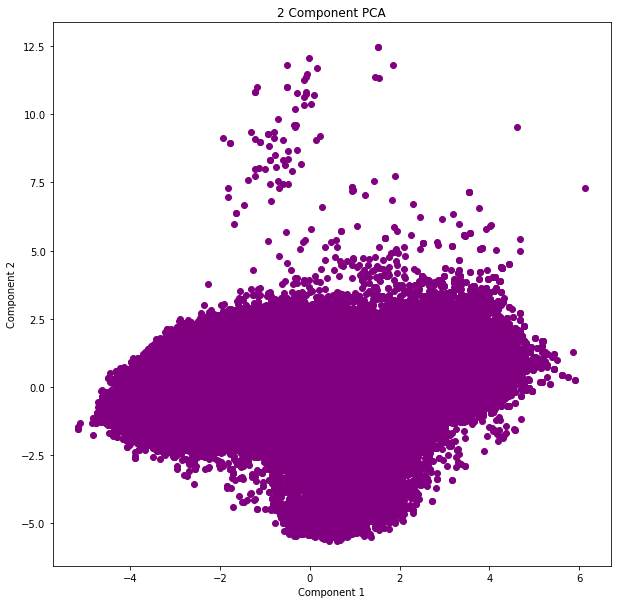

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['energy'], PCA_dataset1['instrumentalness'], color = 'purple') #c = y_kmeans, s=10)

The plot of the dataset based on the 2 components using PCA, which is will be used for instrumentalness and energy clustering.

####Elbow Method for the Number of Clusters

100%|██████████| 19/19 [07:01<00:00, 22.19s/it]


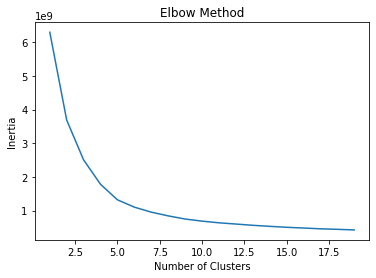

In [ ]:
n_clusters_range = np.arange(1, 20)
intra_cluster_var = []

for k in tqdm(n_clusters_range):
    model = KMeans(n_clusters=k)
    model.fit(df)
    intra_cluster_var.append(model.inertia_)
    
plt.plot(n_clusters_range, intra_cluster_var)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

Here, it can be seen that there is an elbow at 2. Also, from the interprenetion of the previous scatter plot we can use 2 as the number of clusters.

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 1) 
y_kmeans = kmeans.fit(df)
y_kmeans.labels_.shape

(235675,)

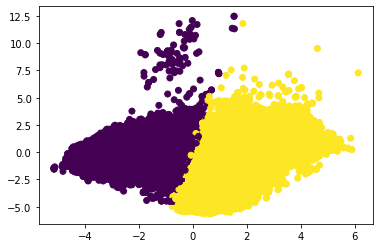

In [ ]:
plt.scatter(principalComponents1[:, 0], principalComponents1[:, 1], c=y_kmeans.labels_)

The illustration of the clusters obtained with PCA and kmeans can be seen here.

In [ ]:
df['energy'] = PCA_dataset1['energy']
df['instrumentalness'] = PCA_dataset1['instrumentalness']

###Relating the clusters with genres

In [ ]:
means_pop= pop_df.mean()
means_rock= rock_df.mean()
means_indie = indie_df.mean()
type(means_pop)

pandas.core.series.Series

In [ ]:
labels  = model.labels_
cluster1_means = df.iloc[np.where(labels == 0)].mean()
cluster2_means = df.iloc[np.where(labels == 1)].mean()

Here, the means of two clusters' and genre data files' features are stored in these series.

####Relating Pop Genre

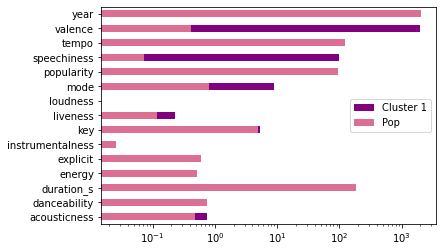

In [ ]:
cluster1_means.plot(kind ='barh', logx=True, color = 'purple', label = 'Cluster 1', legend = True)
means_pop.plot(kind ='barh', logx=True, color = 'palevioletred', label = 'Pop',legend = True)

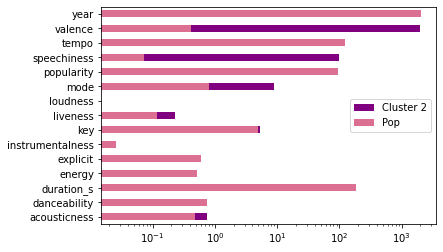

In [ ]:
cluster1_means.plot(kind ='barh', logx=True, color = 'purple', label = 'Cluster 2', legend = True)
means_pop.plot(kind ='barh', logx=True, color = 'palevioletred', label = 'Pop',legend = True)

By relating the pop genres' features with cluster features, it can be seen that the two clusters are similarly related with the pop genre. The means of year, tempo, popularity, key, explicitness, energy, duration, danceability features are almost the same between the clusters and the pop genre features. Even though, it is no surprise that the instrumentalness and energy values are similar -since we made the clustering based on these components-, the features of the series are really similar.

####Relating Rock Genre

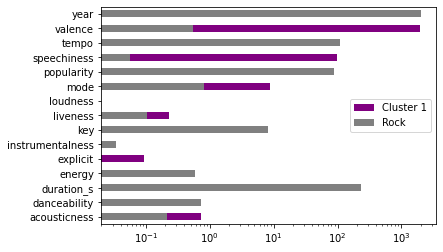

In [ ]:
cluster1_means.plot(kind ='barh', logx=True, color = 'purple', label = 'Cluster 1', legend = True)
means_rock.plot(kind ='barh', logx=True, color = 'grey', label = 'Rock',legend = True)

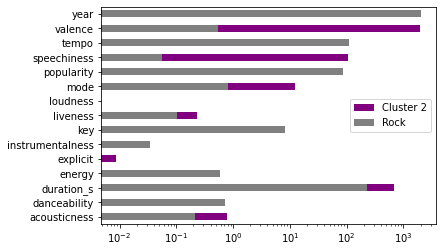

In [ ]:
cluster2_means.plot(kind ='barh', logx=True, color = 'purple', label = 'Cluster 2', legend = True)
means_rock.plot(kind ='barh', logx=True, color = 'grey', label = 'Rock',legend = True)

Here, we can see that the rock features are not as similar as the pop features with the clusters. The high popularity of pop may be the reason of it.
However, there are many similar features exist between clusters and the rock features. For instance the tempo, energy, instrumentalness and danceability means match.

####Relating Indie Genre

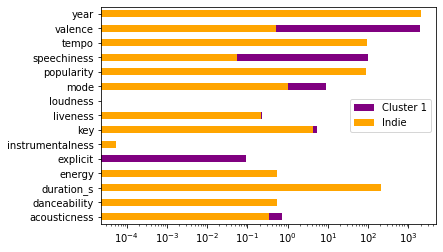

In [ ]:
cluster1_means.plot(kind ='barh', logx=True, color = 'purple', label = 'Cluster 1', legend = True)
means_indie.plot(kind ='barh', logx=True, color = 'orange', label = 'Indie',legend = True)

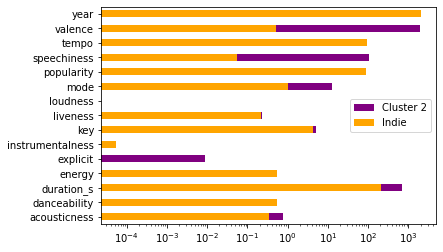

In [ ]:
cluster2_means.plot(kind ='barh', logx=True, color = 'purple', label = 'Cluster 2', legend = True)
means_indie.plot(kind ='barh', logx=True, color = 'orange', label = 'Indie',legend = True)

From the plots, indie features are more similar to cluster features than the rock features. There exist  many similar features exist between clusters and the indie features, such as the year, tempo, popularity, liveness, energy, instrumentalness and danceability means match. So, it can be said that the indie features are similar to the cluster features.

**Conclusion:**

In this project, we did exploratory data analysis, statistical analysis & hypothesis testing and machine learning on Spotify dataset. All of these parts contains different theories and applications. We used different datasets to make comparison, prediction, evoluation, clustering... We can do many things with datasets and create many application with them. In song recommendation part, the results can be improved by giving different weight distribution to features.

In our future works, we can use the same techniques on different datasets. 